In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Machine Learning - 1/Project/Clustering+Clean+Ads_Data.xlsx'
DF = pd.read_excel(path)

Mounted at /content/drive


In [ ]:
DF.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
DF.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [ ]:
DF.shape

(23066, 19)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [ ]:
DF.duplicated().sum()

0

In [ ]:
DF['Ad Type'].nunique()

14

In [ ]:
DF['Ad Type'].unique()

array(['Inter222', 'Inter227', 'Inter228', 'Inter217', 'Inter219',
       'Inter221', 'Inter223', 'Inter225', 'Inter229', 'Inter224',
       'inter230', 'Inter226', 'Inter220', 'Inter218'], dtype=object)

In [ ]:
DF.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
def fix_missing_values (row):
  if pd.isnull(row['CTR']):
      return (row['Clicks']/row['Impressions'])*100
  else:
    return row['CTR']
DF['CTR'] = DF.apply(fix_missing_values,axis=1)


In [ ]:
def fix_missing_values_CPM (row):
  if pd.isnull(row['CPM']):
      return (row['Spend']/row['Impressions'])*1000
  else:
    return row['CPM']
DF['CPM'] = DF.apply(fix_missing_values_CPM, axis =1)

In [ ]:
def fix_missing_values_CPC (row):
  if pd.isnull(row['CPC']):
      return row['Spend']/row['Clicks']
  else:
    return row['CPC']
DF['CPC'] = DF.apply(fix_missing_values_CPC, axis =1)

In [ ]:
DF.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


In [ ]:
DF.CTR.isnull().sum()

0

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
DF['CTR'].iloc[1700].round(2)

0.12

In [ ]:
DF['CPM'].iloc[18359].round(2)

13.13

In [ ]:
DF['CPC'].iloc[18359].round(2)

0.08

##Univariate Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(DF[column].describe(),end=' ')


    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(DF[column].min())
    b=round(DF[column].max())
    freq, bins, patches = plt.hist(DF[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sn.boxplot(x=DF[column])
    #ax.legend()
    plt.show()

In [ ]:
df_num = DF.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [ ]:
type(lstnumericcolumns)

list

In [ ]:
lstnumericcolumns

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [ ]:
df_num.shape

(23066, 13)

In [ ]:
df_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------
BoxPlot of Ad - Length
----------------------------------------------------------------------------


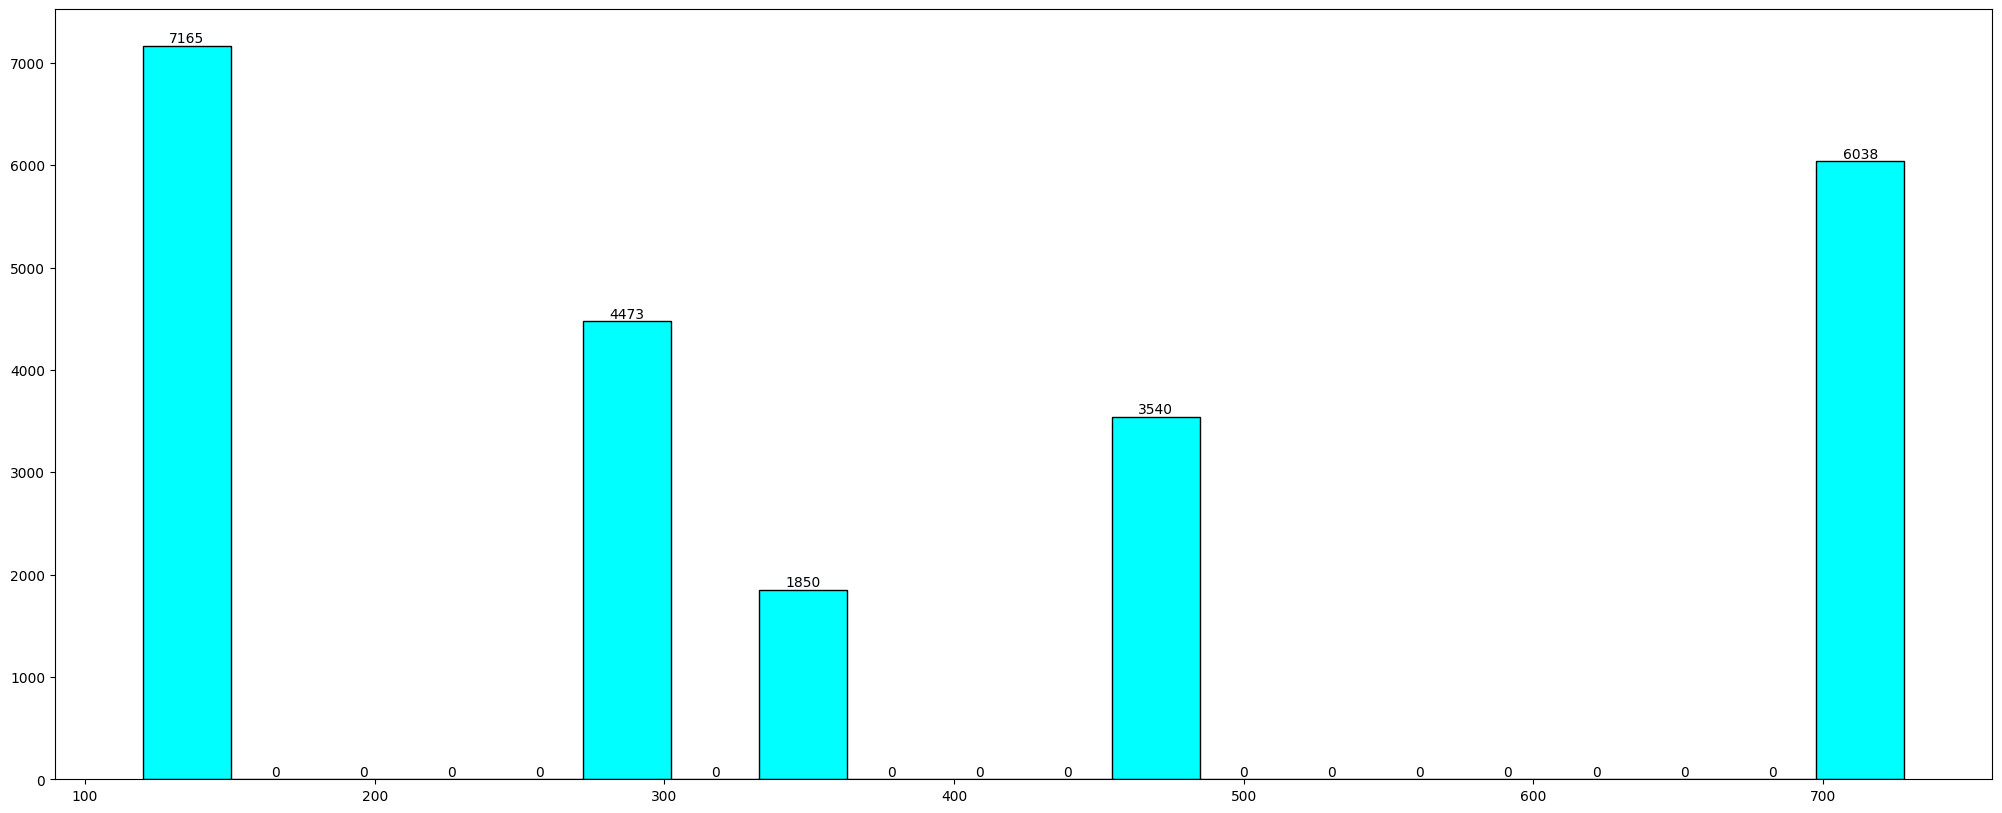

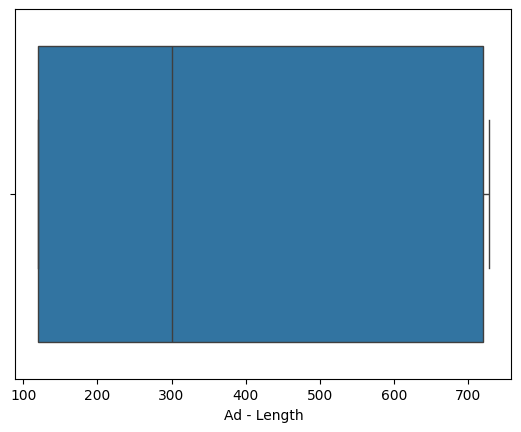

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------
BoxPlot of Ad- Width
----------------------------------------------------------------------------


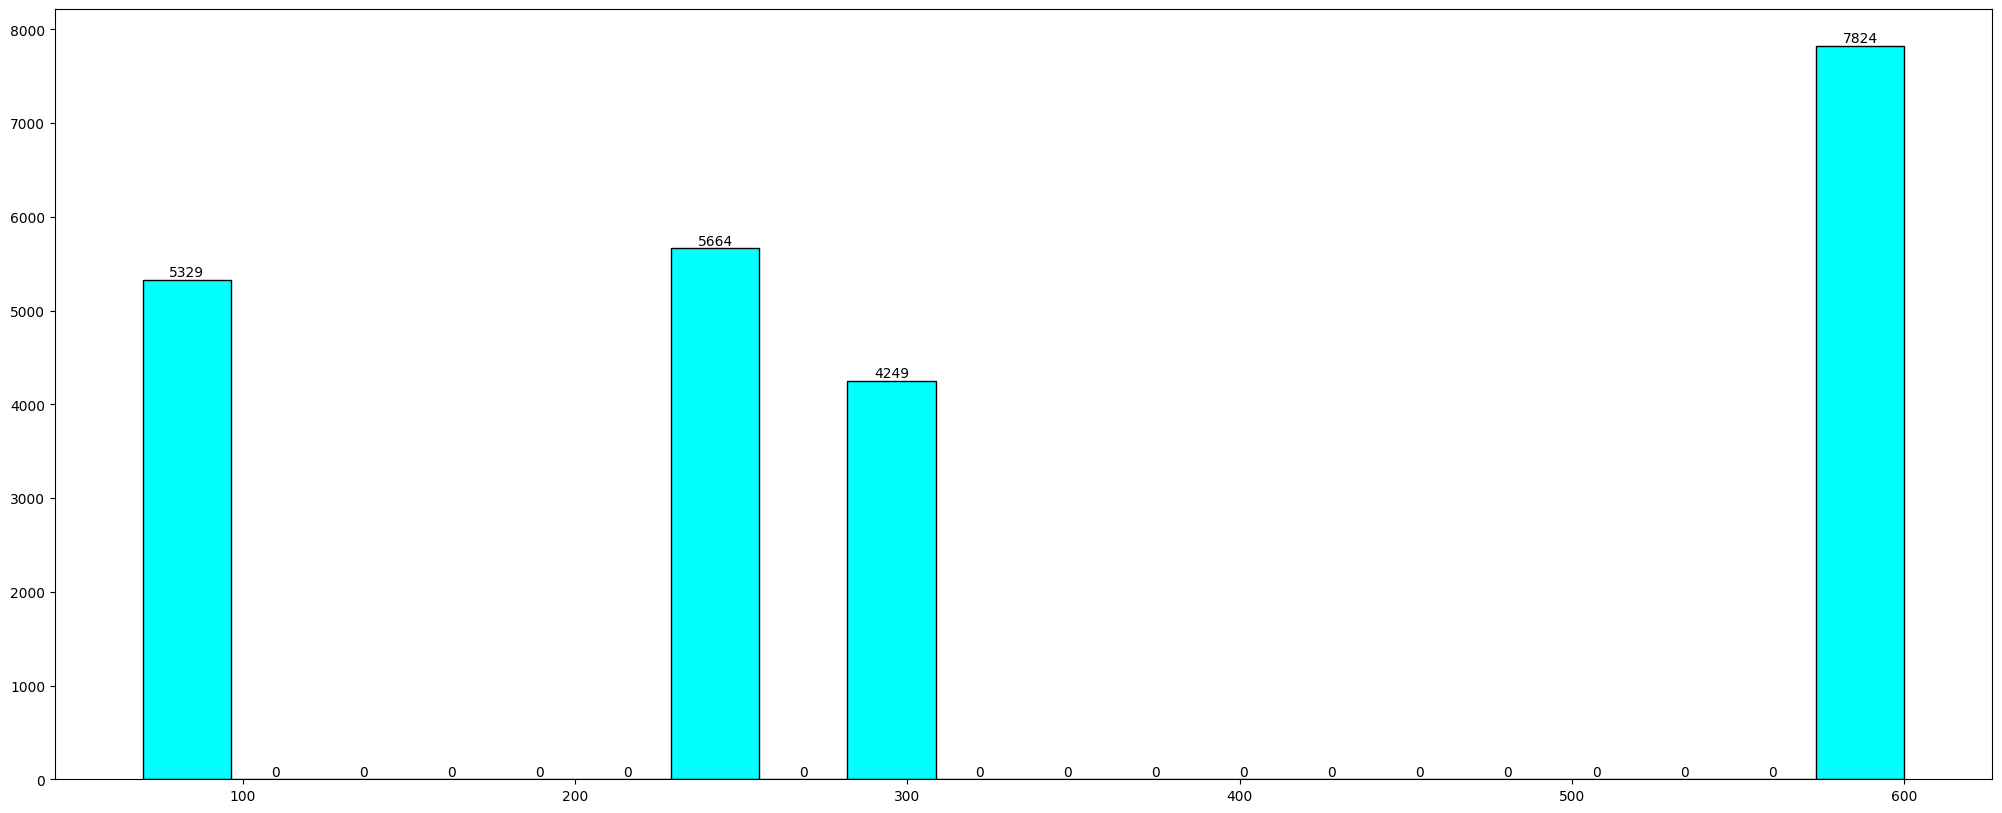

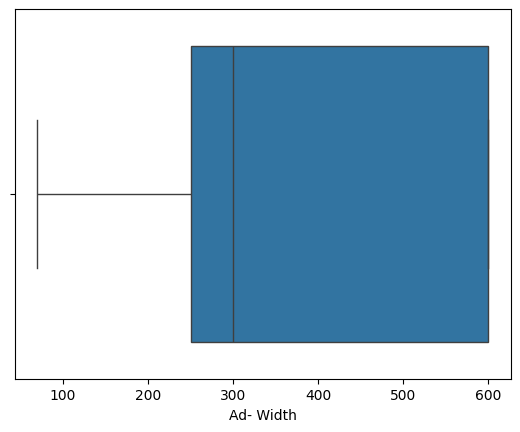

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------
BoxPlot of Ad Size
----------------------------------------------------------------------------


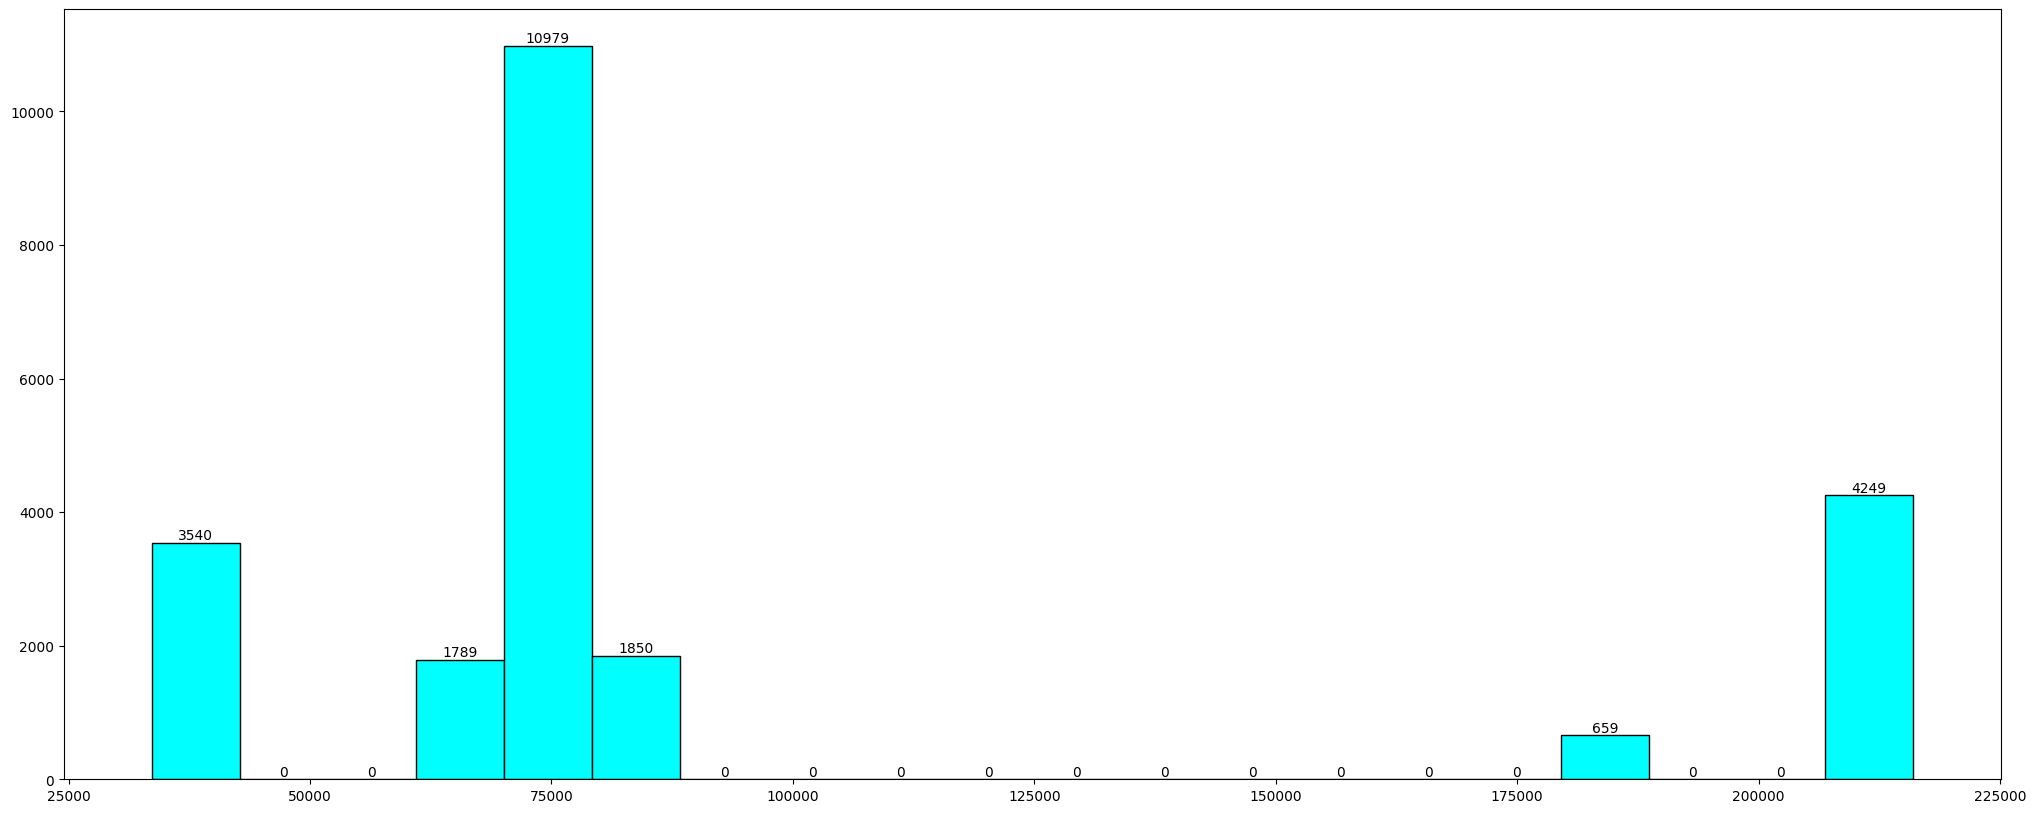

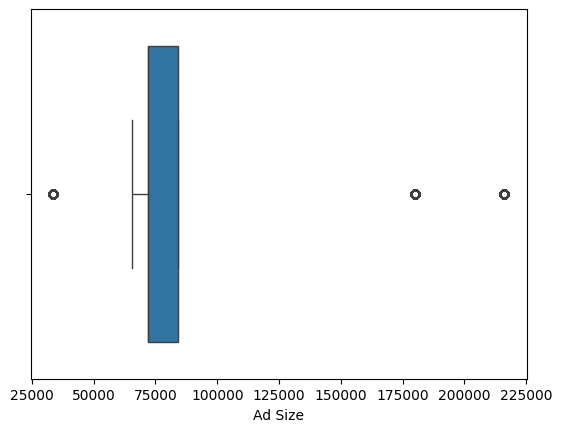

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------
BoxPlot of Available_Impressions
----------------------------------------------------------------------------


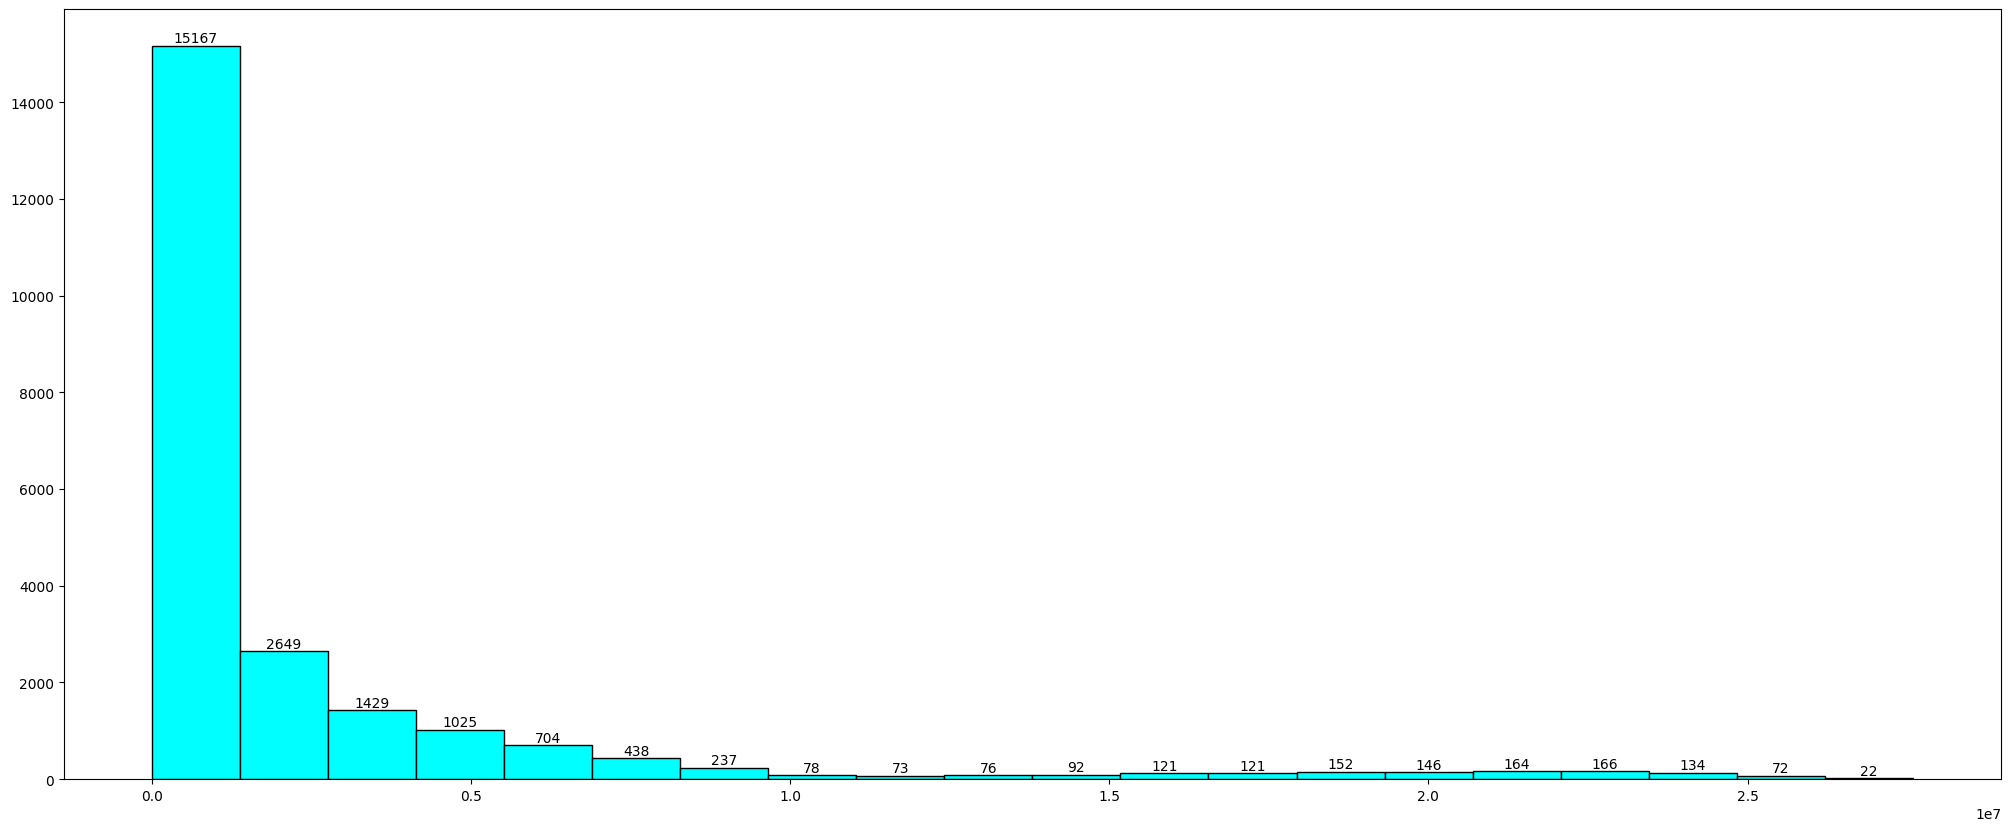

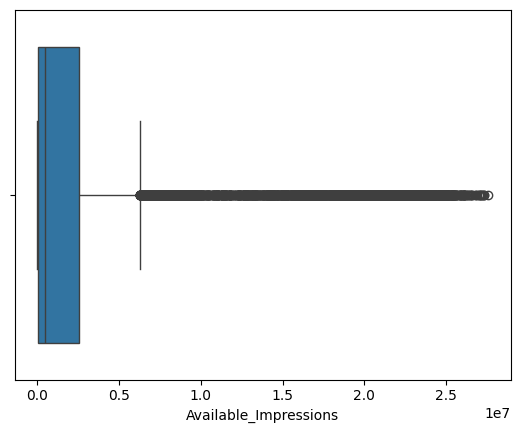

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------
BoxPlot of Matched_Queries
----------------------------------------------------------------------------


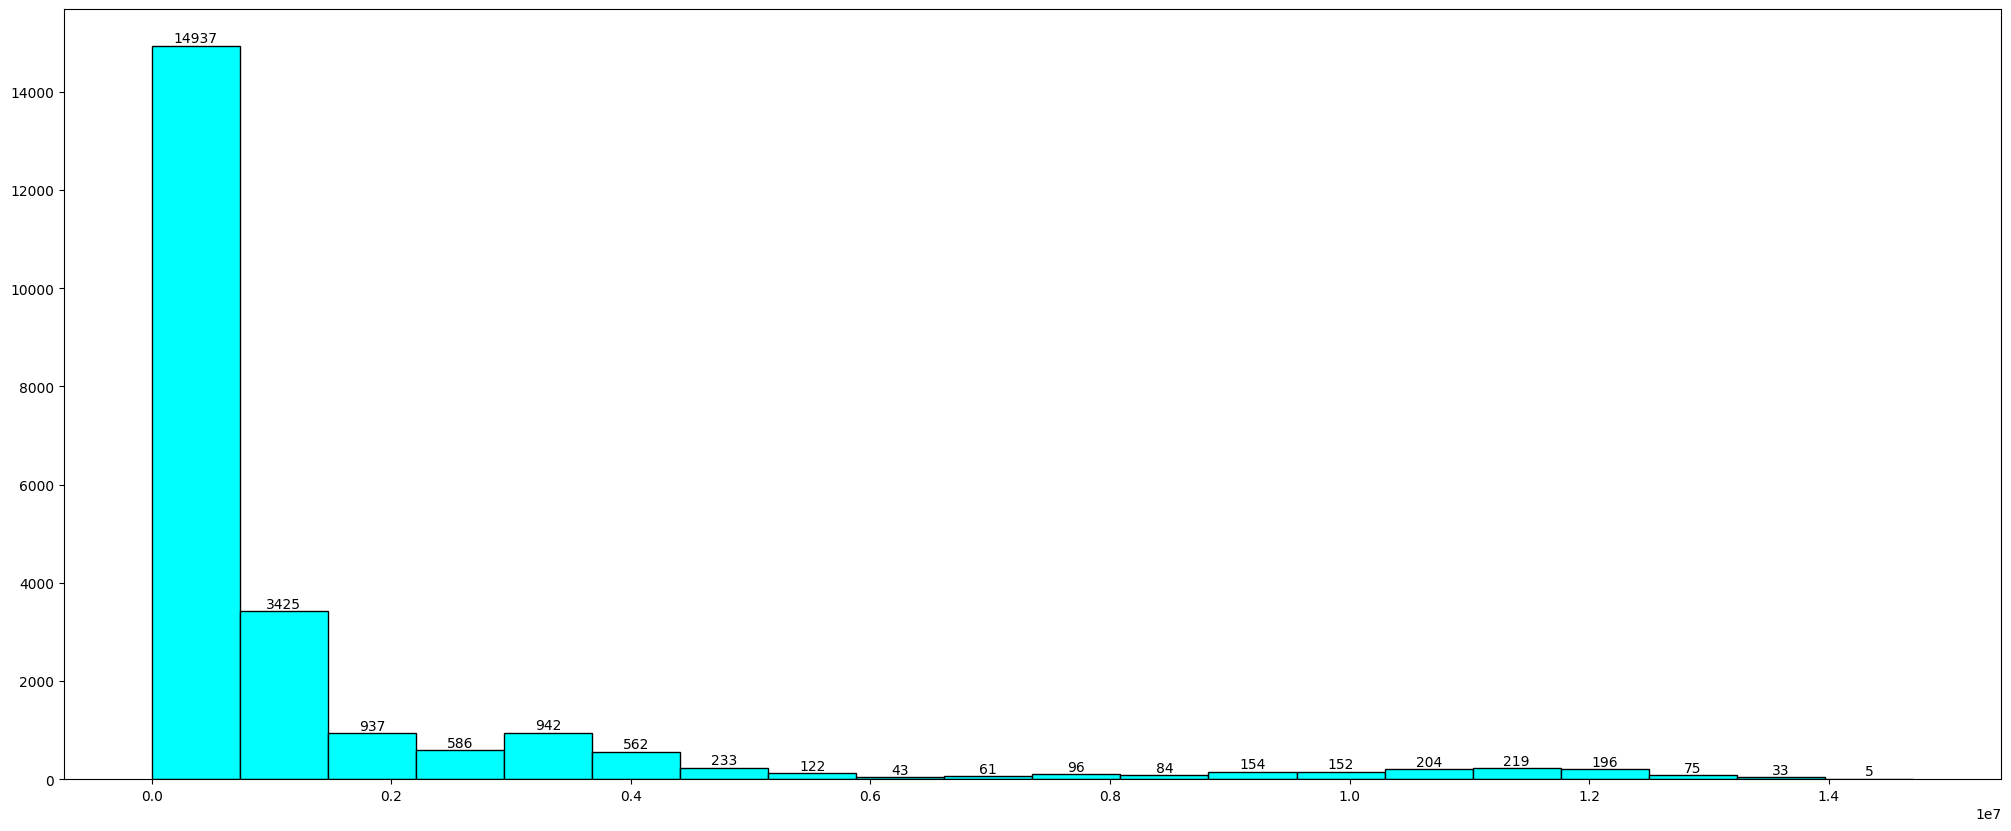

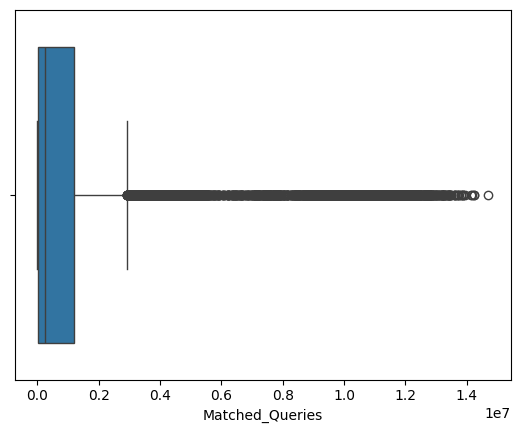

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------
BoxPlot of Impressions
----------------------------------------------------------------------------


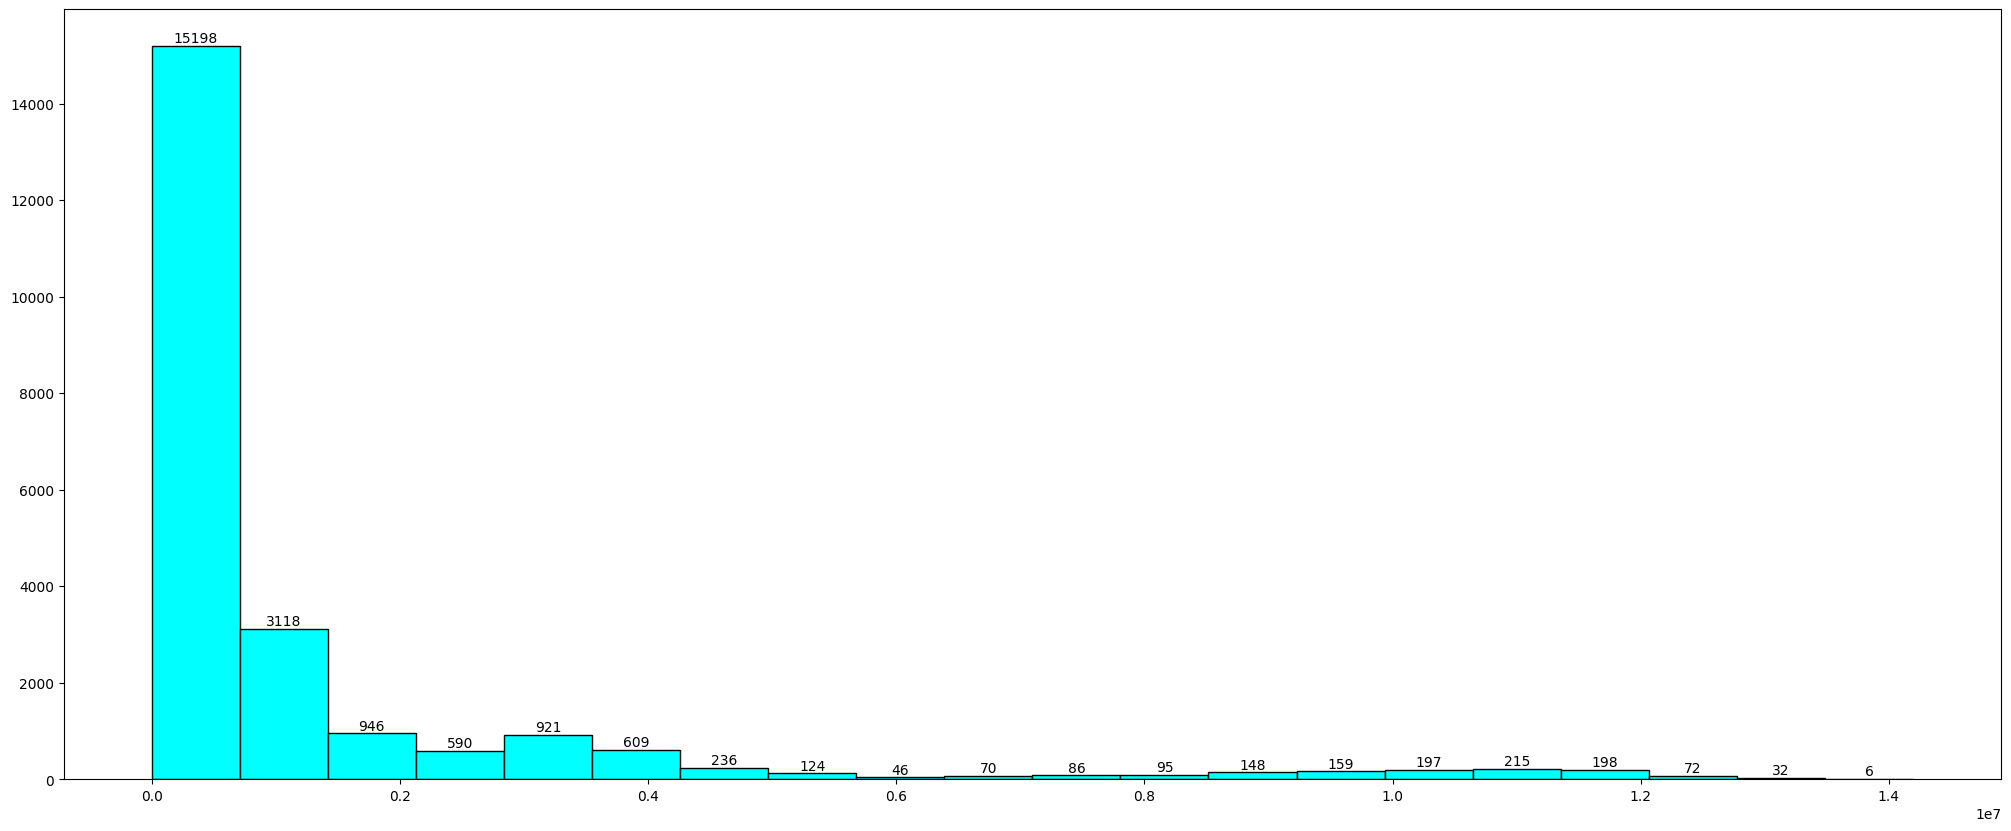

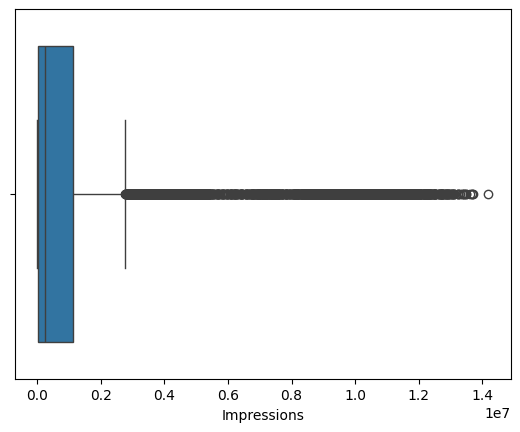

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------
BoxPlot of Clicks
----------------------------------------------------------------------------


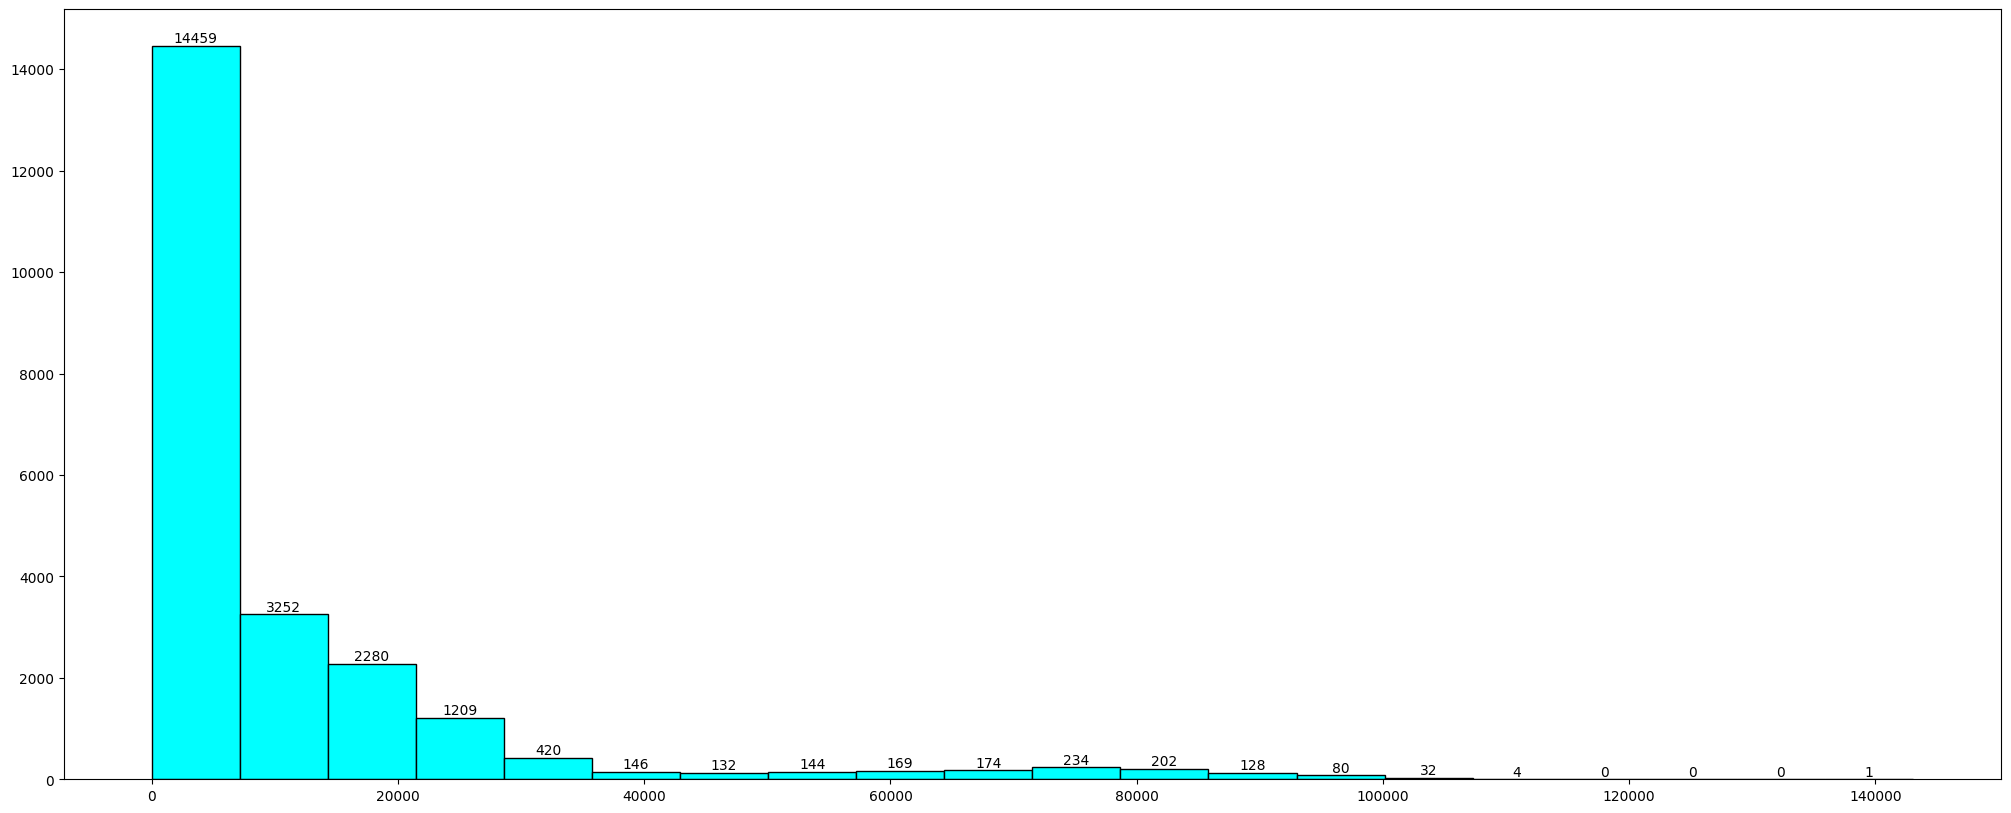

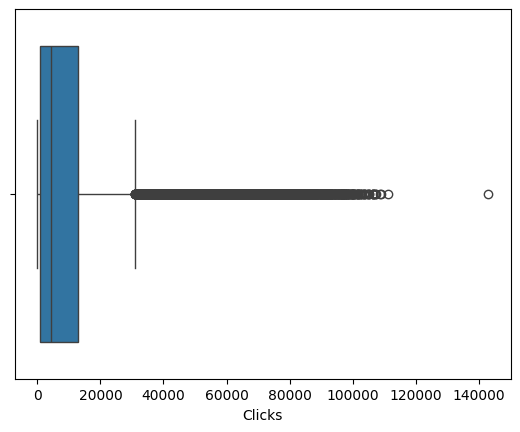

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------
BoxPlot of Spend
----------------------------------------------------------------------------


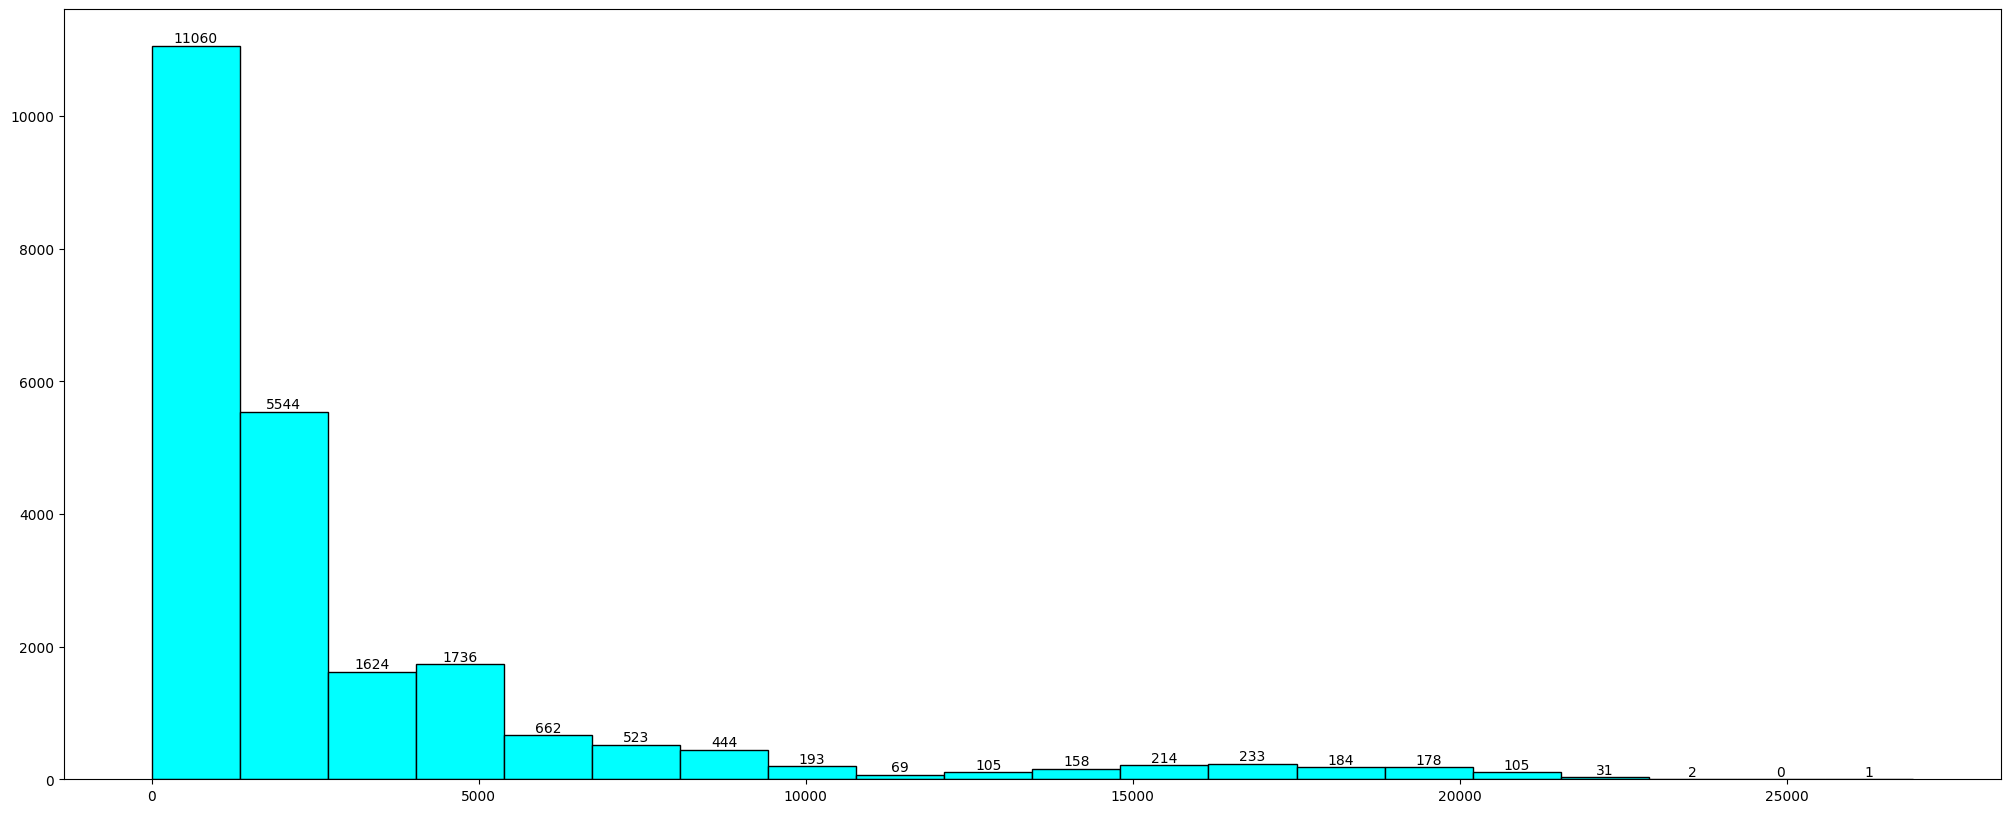

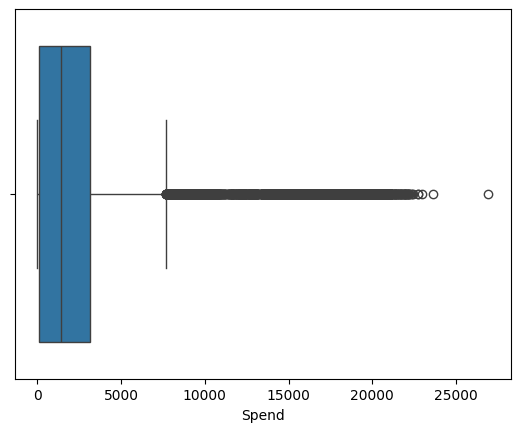

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------
BoxPlot of Fee
----------------------------------------------------------------------------


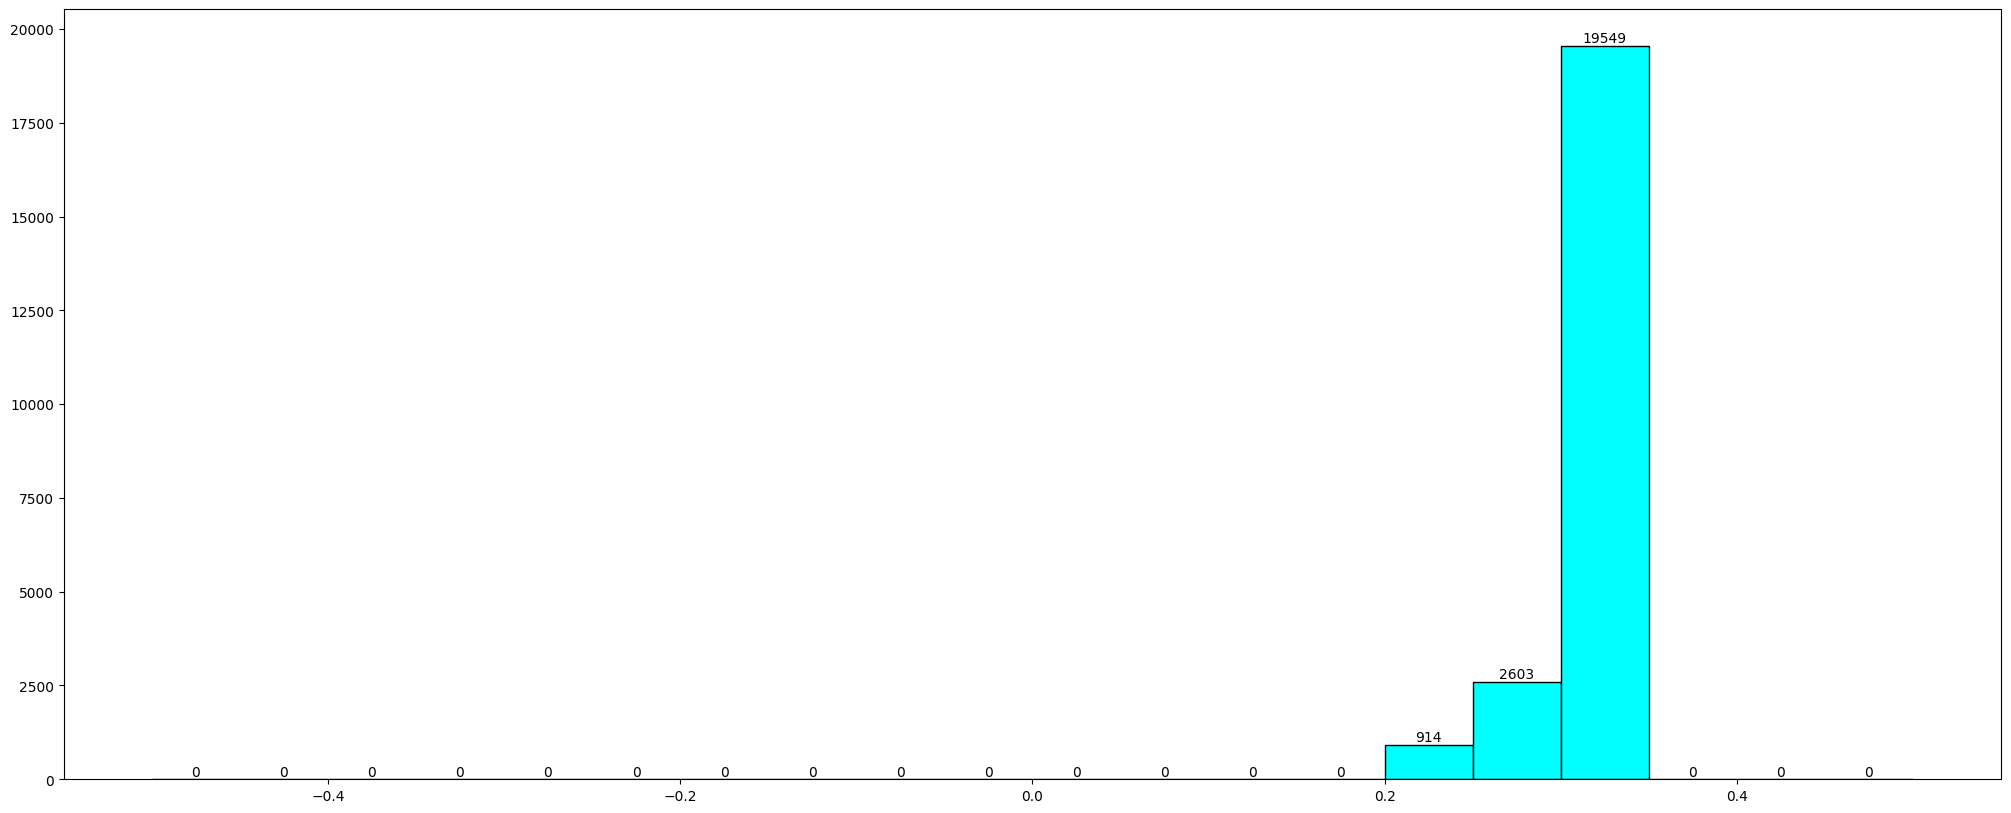

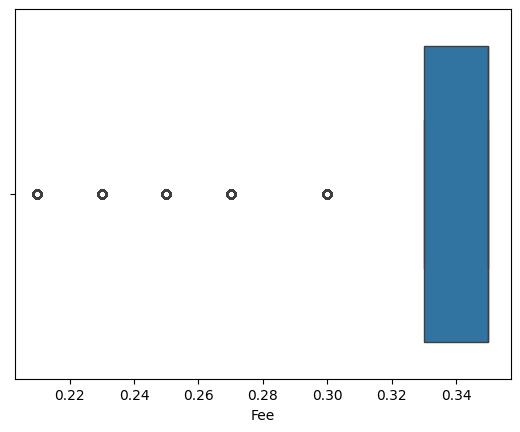

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------
BoxPlot of Revenue
----------------------------------------------------------------------------


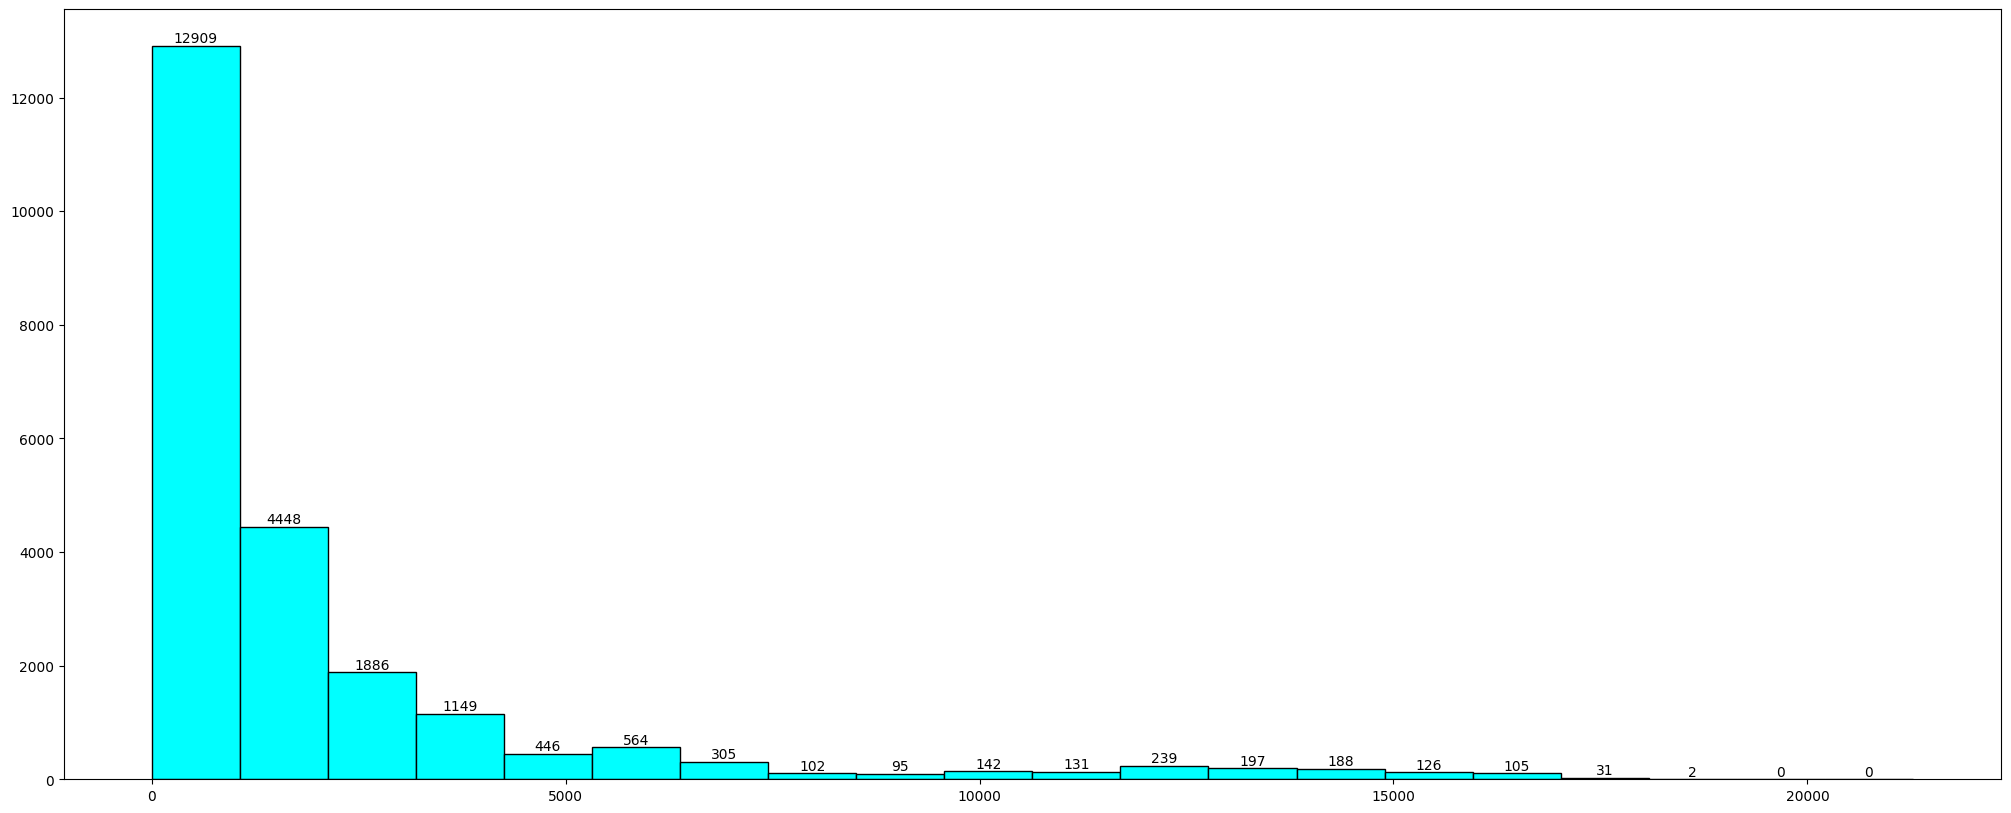

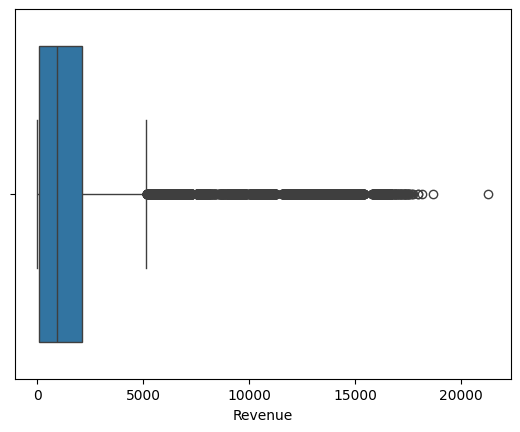

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         2.614863
std          7.853405
min          0.000100
25%          0.003400
50%          0.112650
75%          0.183778
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------
BoxPlot of CTR
----------------------------------------------------------------------------


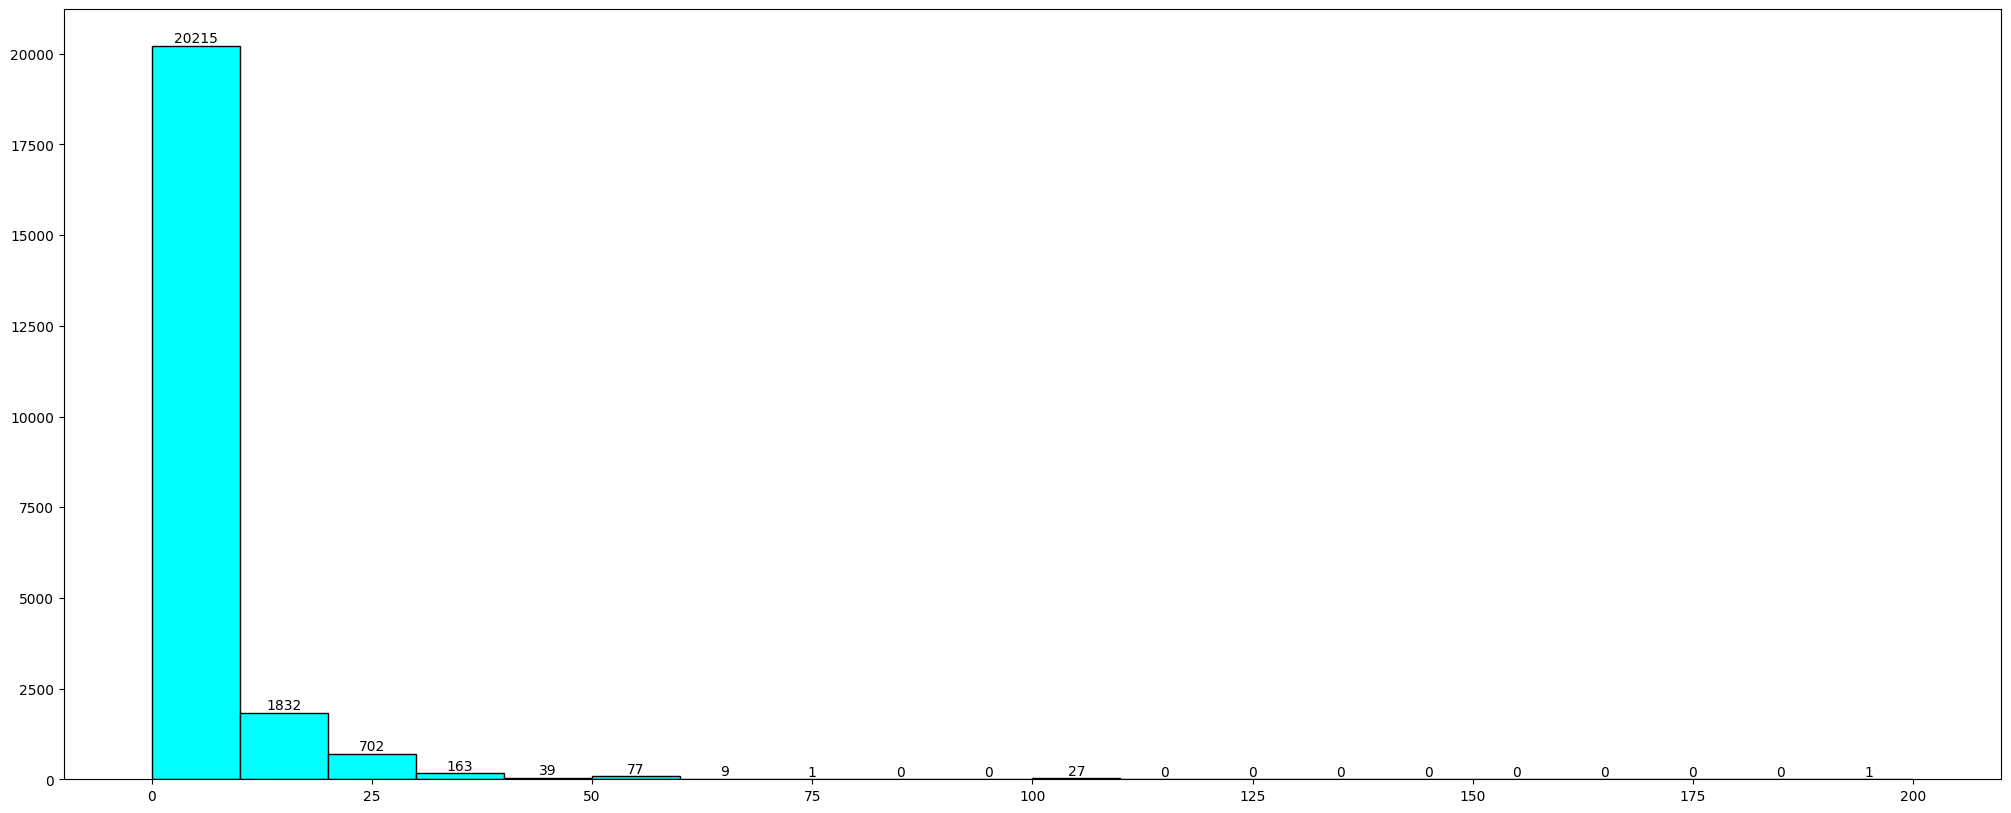

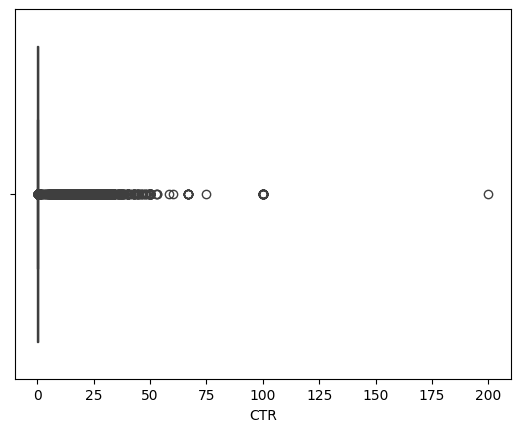

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396730
std          9.057082
min          0.000000
25%          1.750000
50%          8.370742
75%         13.040000
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------
BoxPlot of CPM
----------------------------------------------------------------------------


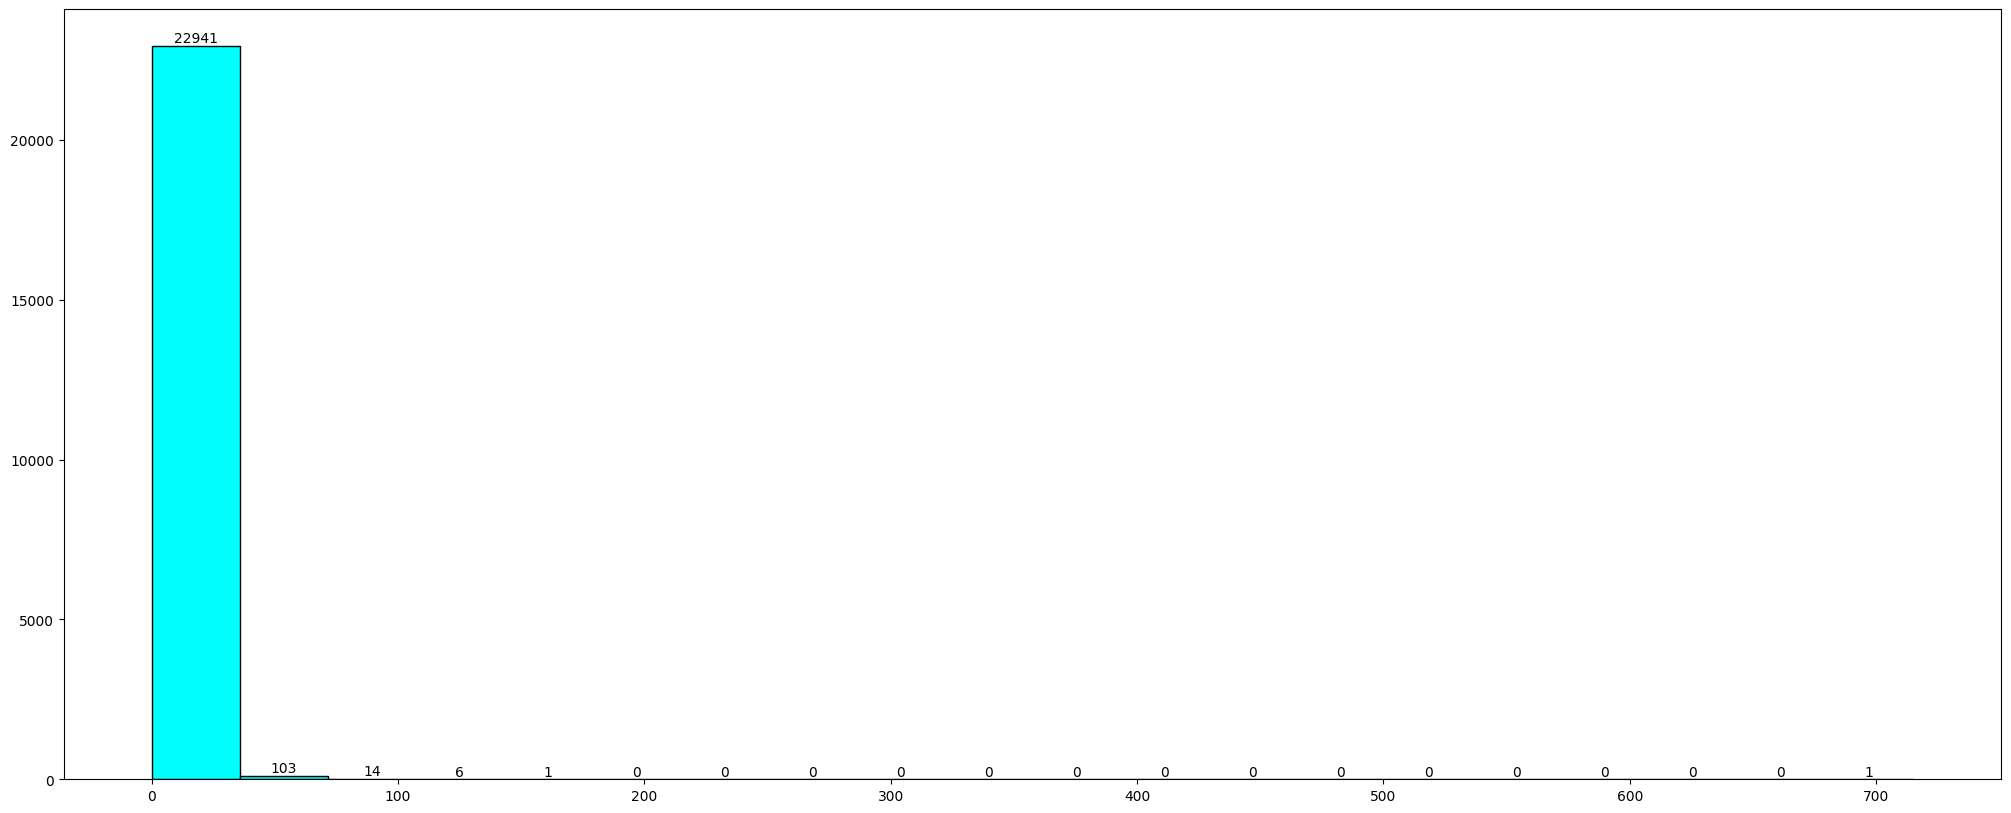

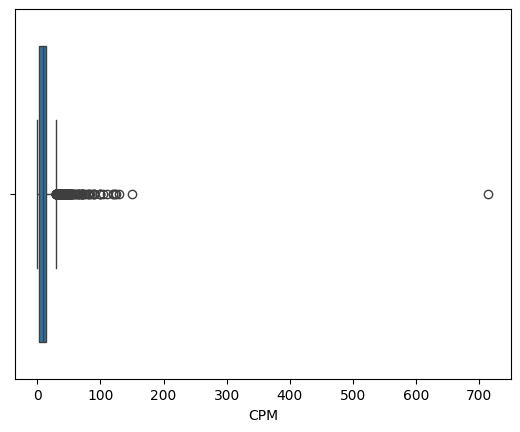

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336652
std          0.341231
min          0.000000
25%          0.090000
50%          0.140000
75%          0.550000
max          7.260000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------
BoxPlot of CPC
----------------------------------------------------------------------------


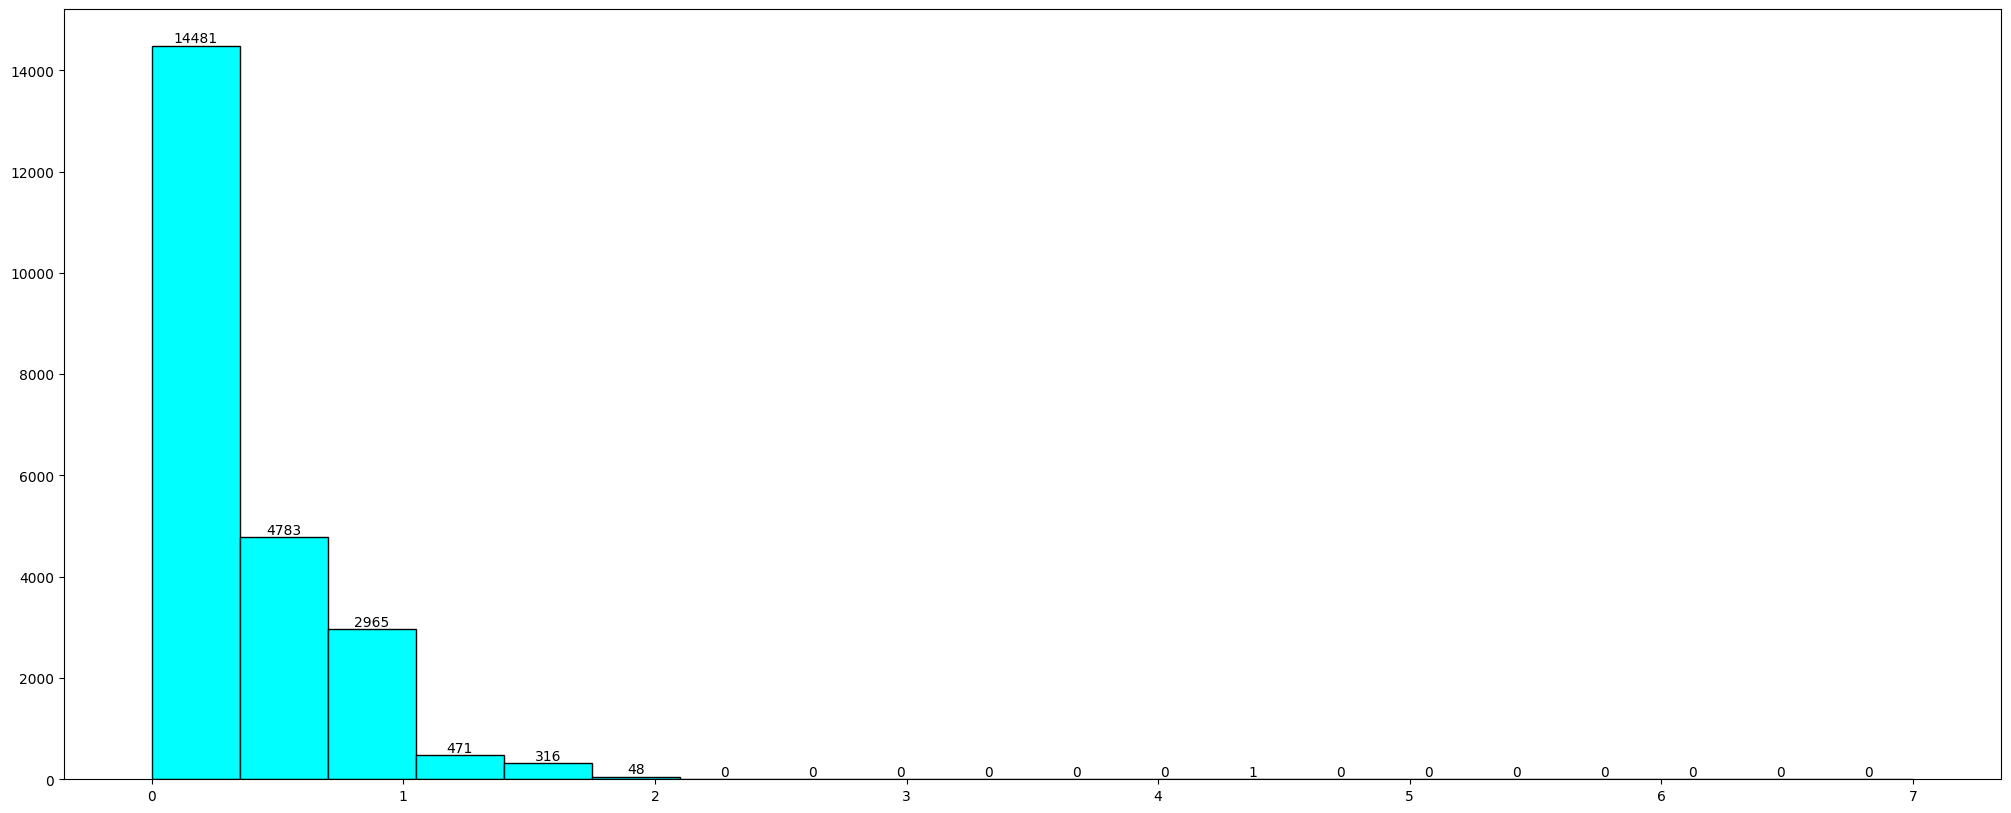

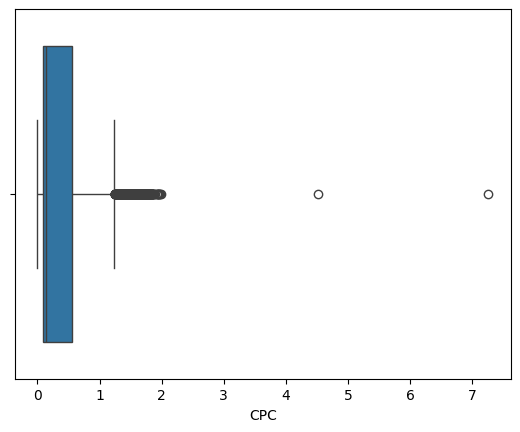

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.

The function should display the frequency of all the levels within the field and display a frequency plot

In [ ]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(20, 10))
    plots = df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(10, 10),
                   textcoords='offset points')
    plt.show()
    print("       ")

In [ ]:
df_cat = DF.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [ ]:
lstcatcolumns.remove('Timestamp')

In [ ]:
lstcatcolumns

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Details of InventoryType
----------------------------------------------------------------
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


<Figure size 640x480 with 0 Axes>

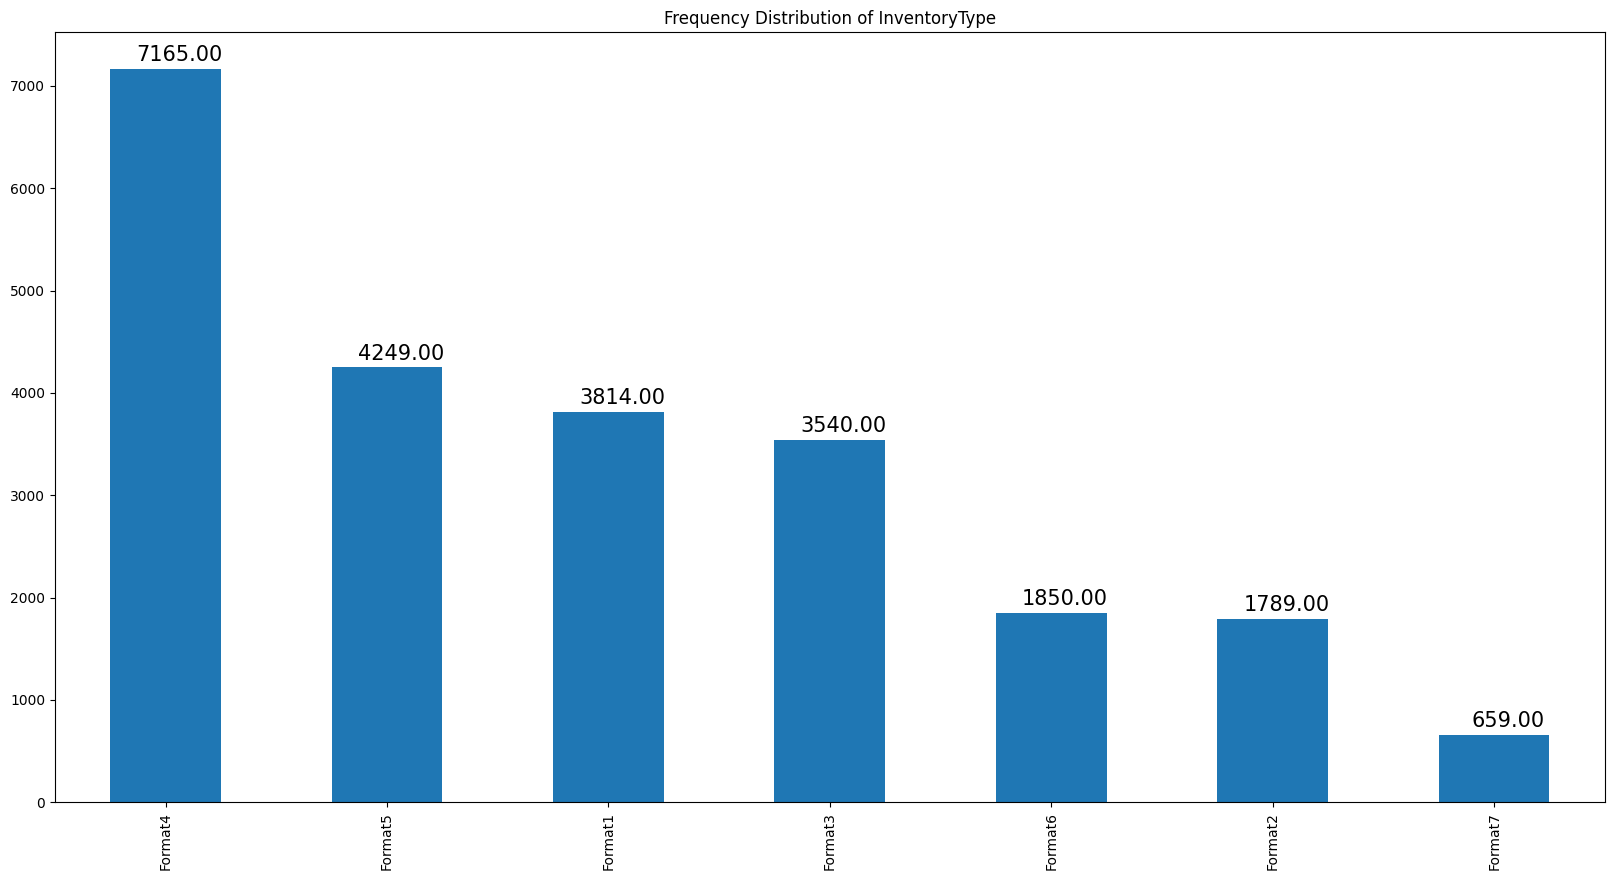

       
Details of Ad Type
----------------------------------------------------------------
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


<Figure size 640x480 with 0 Axes>

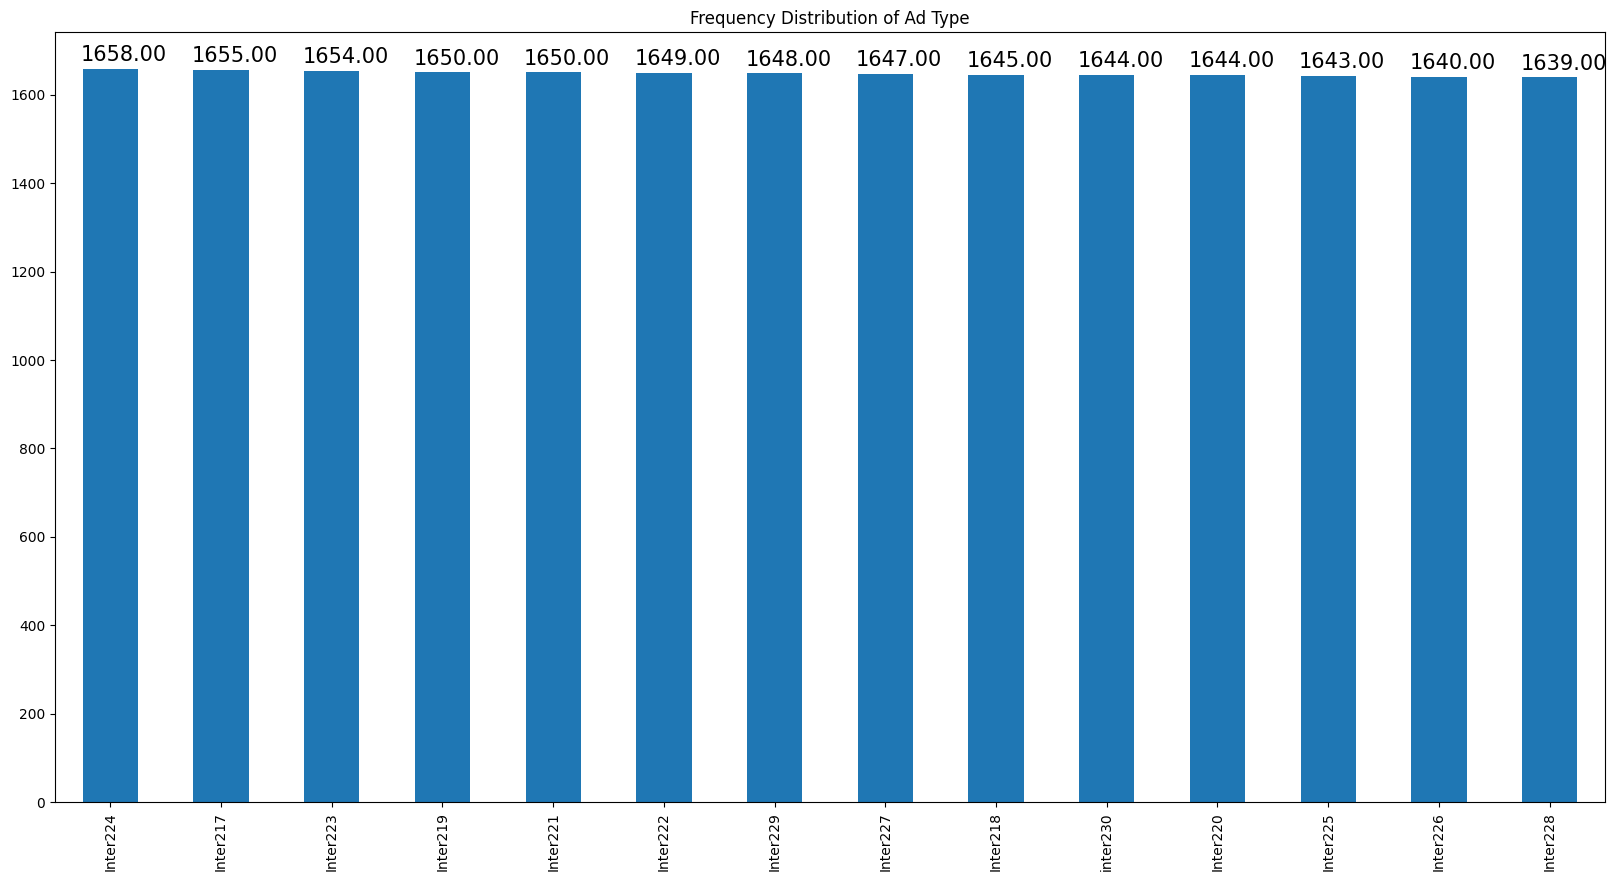

       
Details of Platform
----------------------------------------------------------------
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


<Figure size 640x480 with 0 Axes>

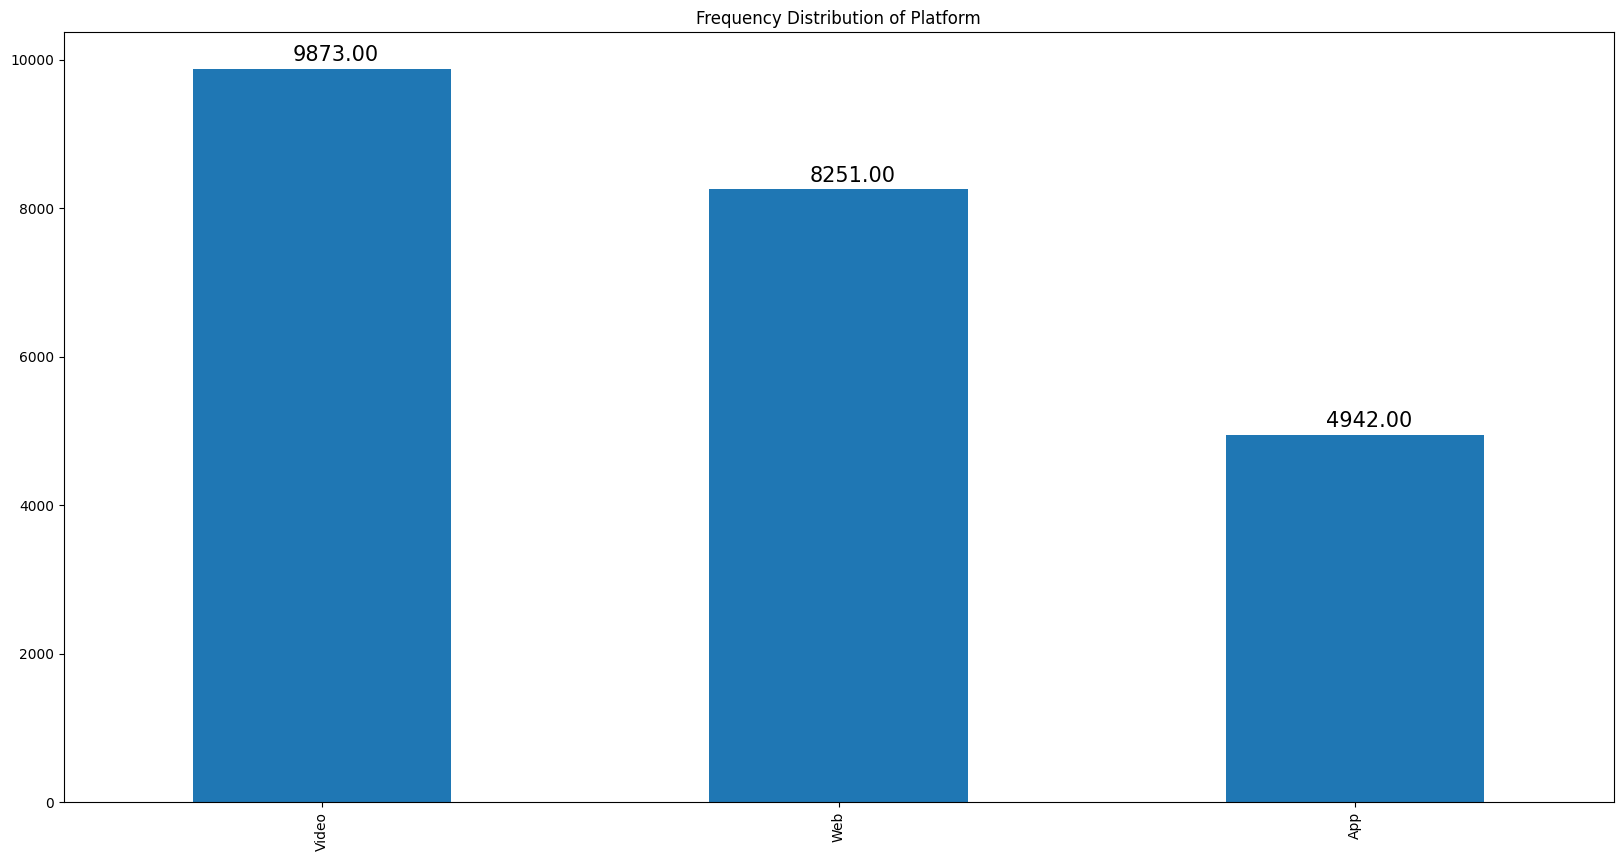

       
Details of Device Type
----------------------------------------------------------------
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


<Figure size 640x480 with 0 Axes>

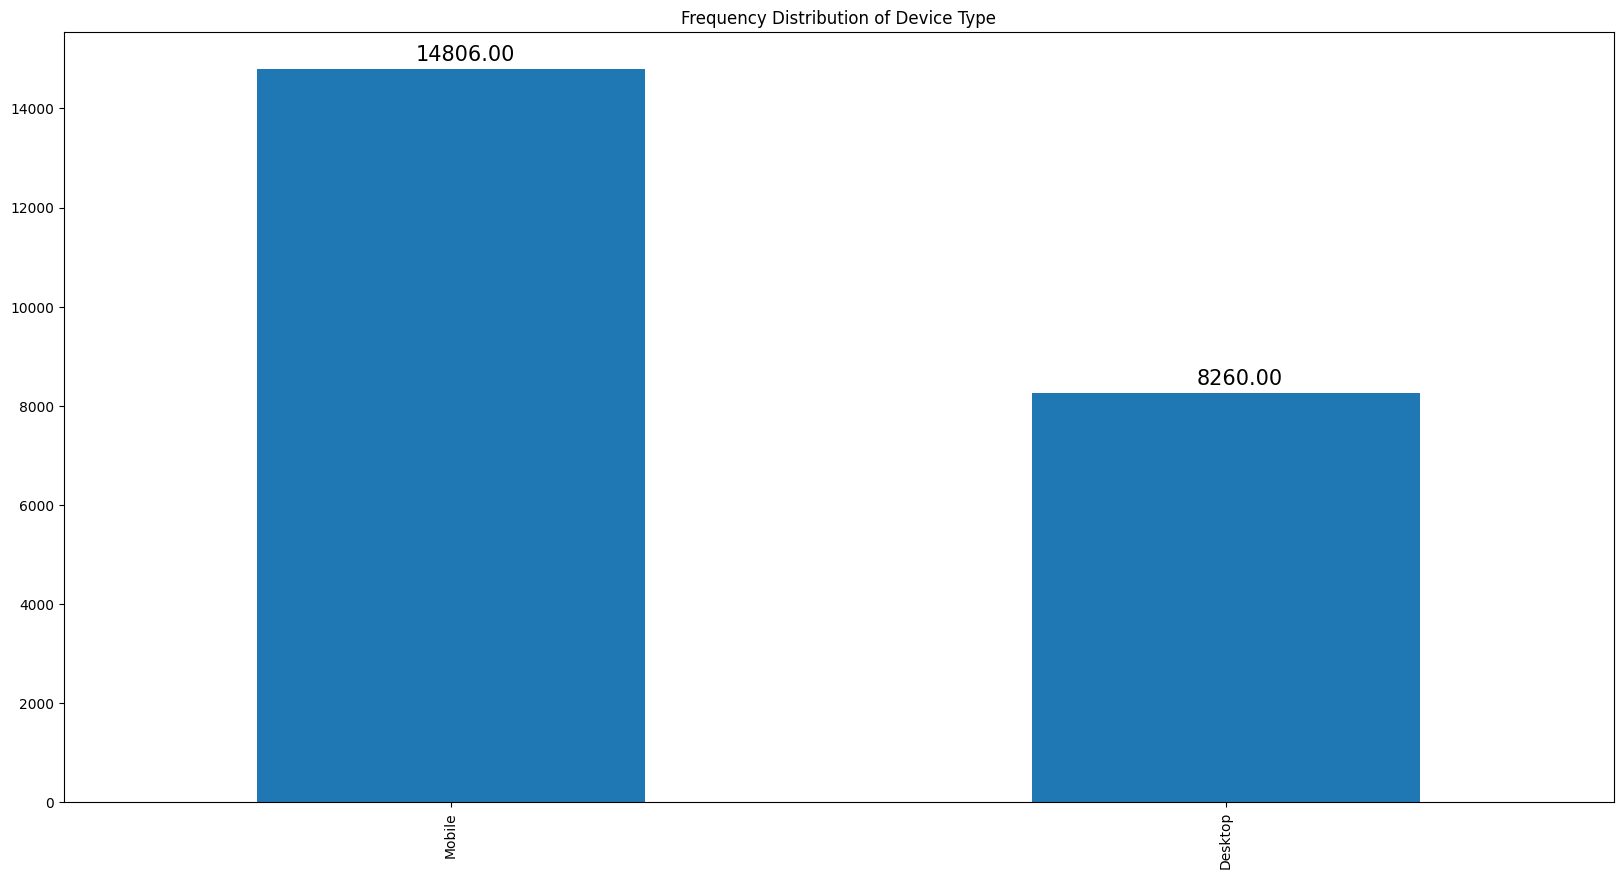

       
Details of Format
----------------------------------------------------------------
Video      11552
Display    11514
Name: Format, dtype: int64


<Figure size 640x480 with 0 Axes>

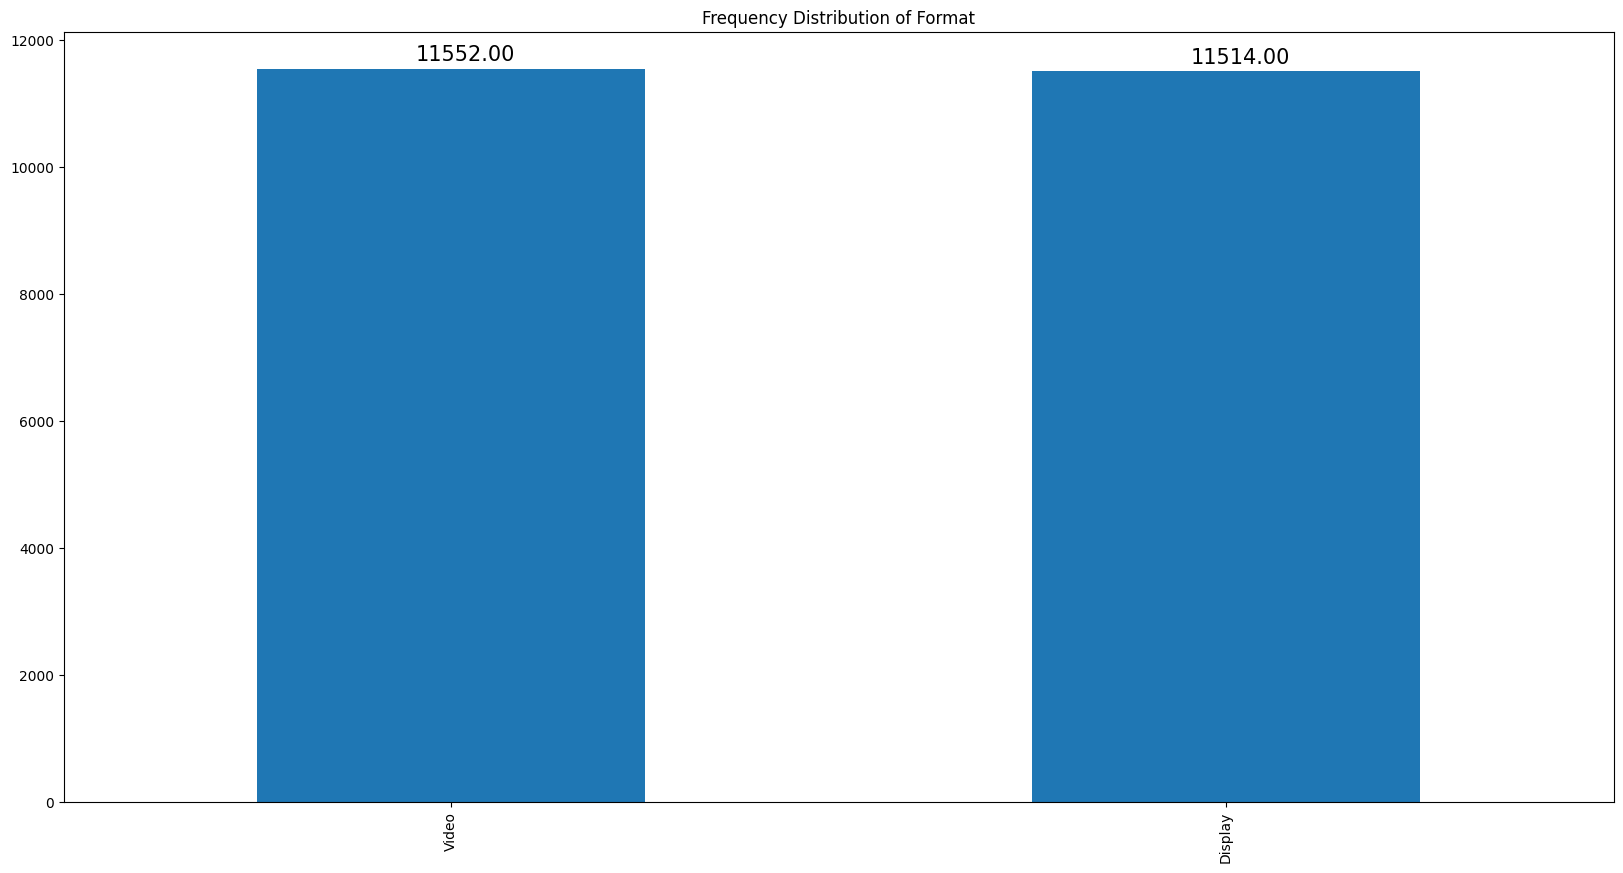

In [ ]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

Bivariate Analysis

In [ ]:
corr = df_num.corr(method='pearson')

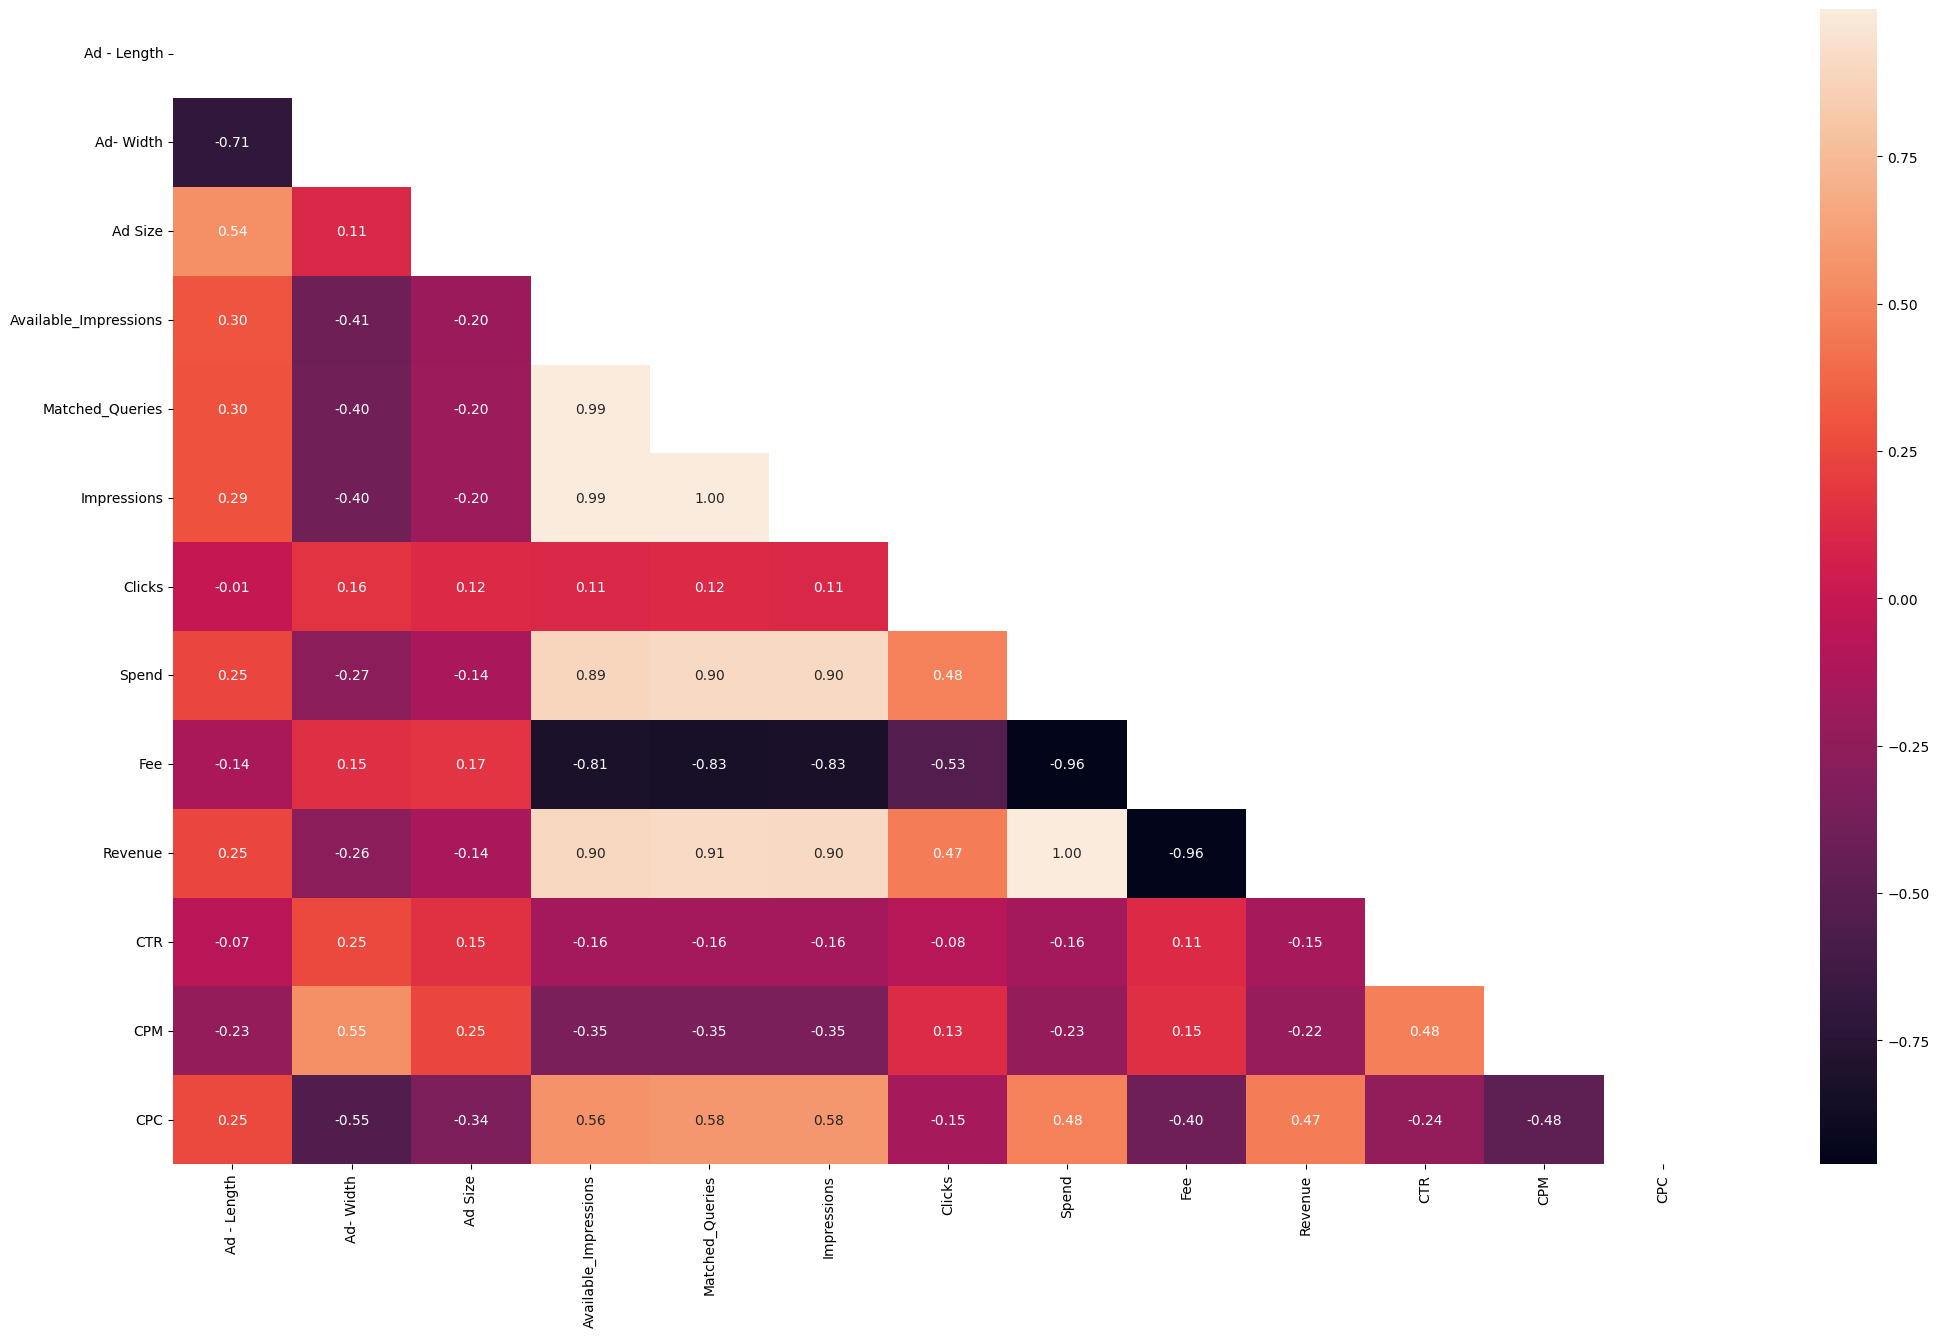

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig = plt.subplots(figsize=(25, 15))
sn.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

Observation
There are considerable number of features that are highly correlated.

'Impressions' shows high correlation with 'Available_Impressions','Matched_Queries'

'Matched queries' has high correlation with 'Available_Impressions'

'Spend' has high correlation with 'Available_Impressions','Matched_Queries' and 'Impressions'

'Revenue' has high correlation with 'Spend', 'Available_Impressions','Matched_Queries' 'Impressions'

##Outlier Treatment

In [ ]:
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [ ]:
len(lstnumericcolumns)

13

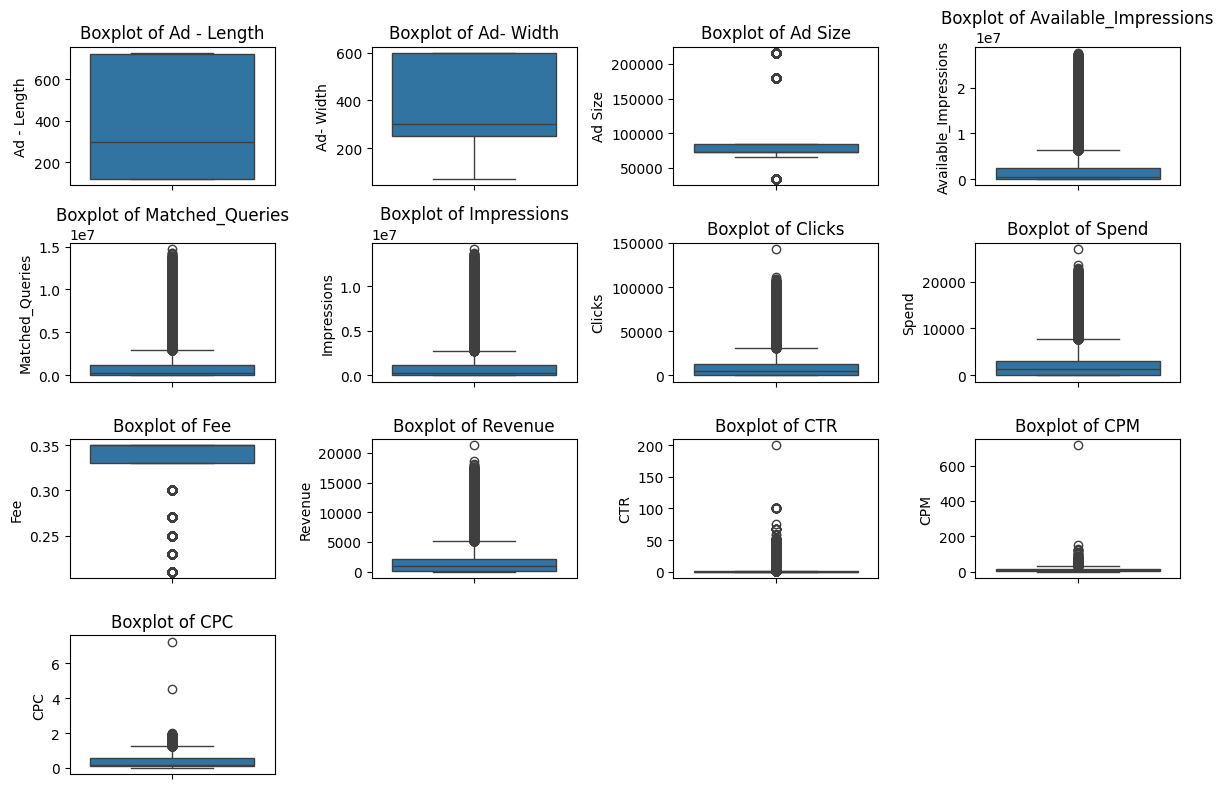

In [ ]:
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sn.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# The count of outliers in each column
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                      3487
CPM                       208
CPC                       568
dtype: int64

In [ ]:
((df_num > (Q3 + 1.5 * IQR)) & (df_num < df_num.quantile(0.95))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                   659
Available_Impressions    1224
Matched_Queries          2038
Impressions              2115
Clicks                    537
Spend                     927
Fee                         0
Revenue                  1171
CTR                      2332
CPM                         0
CPC                         0
dtype: int64

In [ ]:
no_outlier = ['Ad - Length', 'Ad- Width', 'Fee', 'CPM', 'CPC']

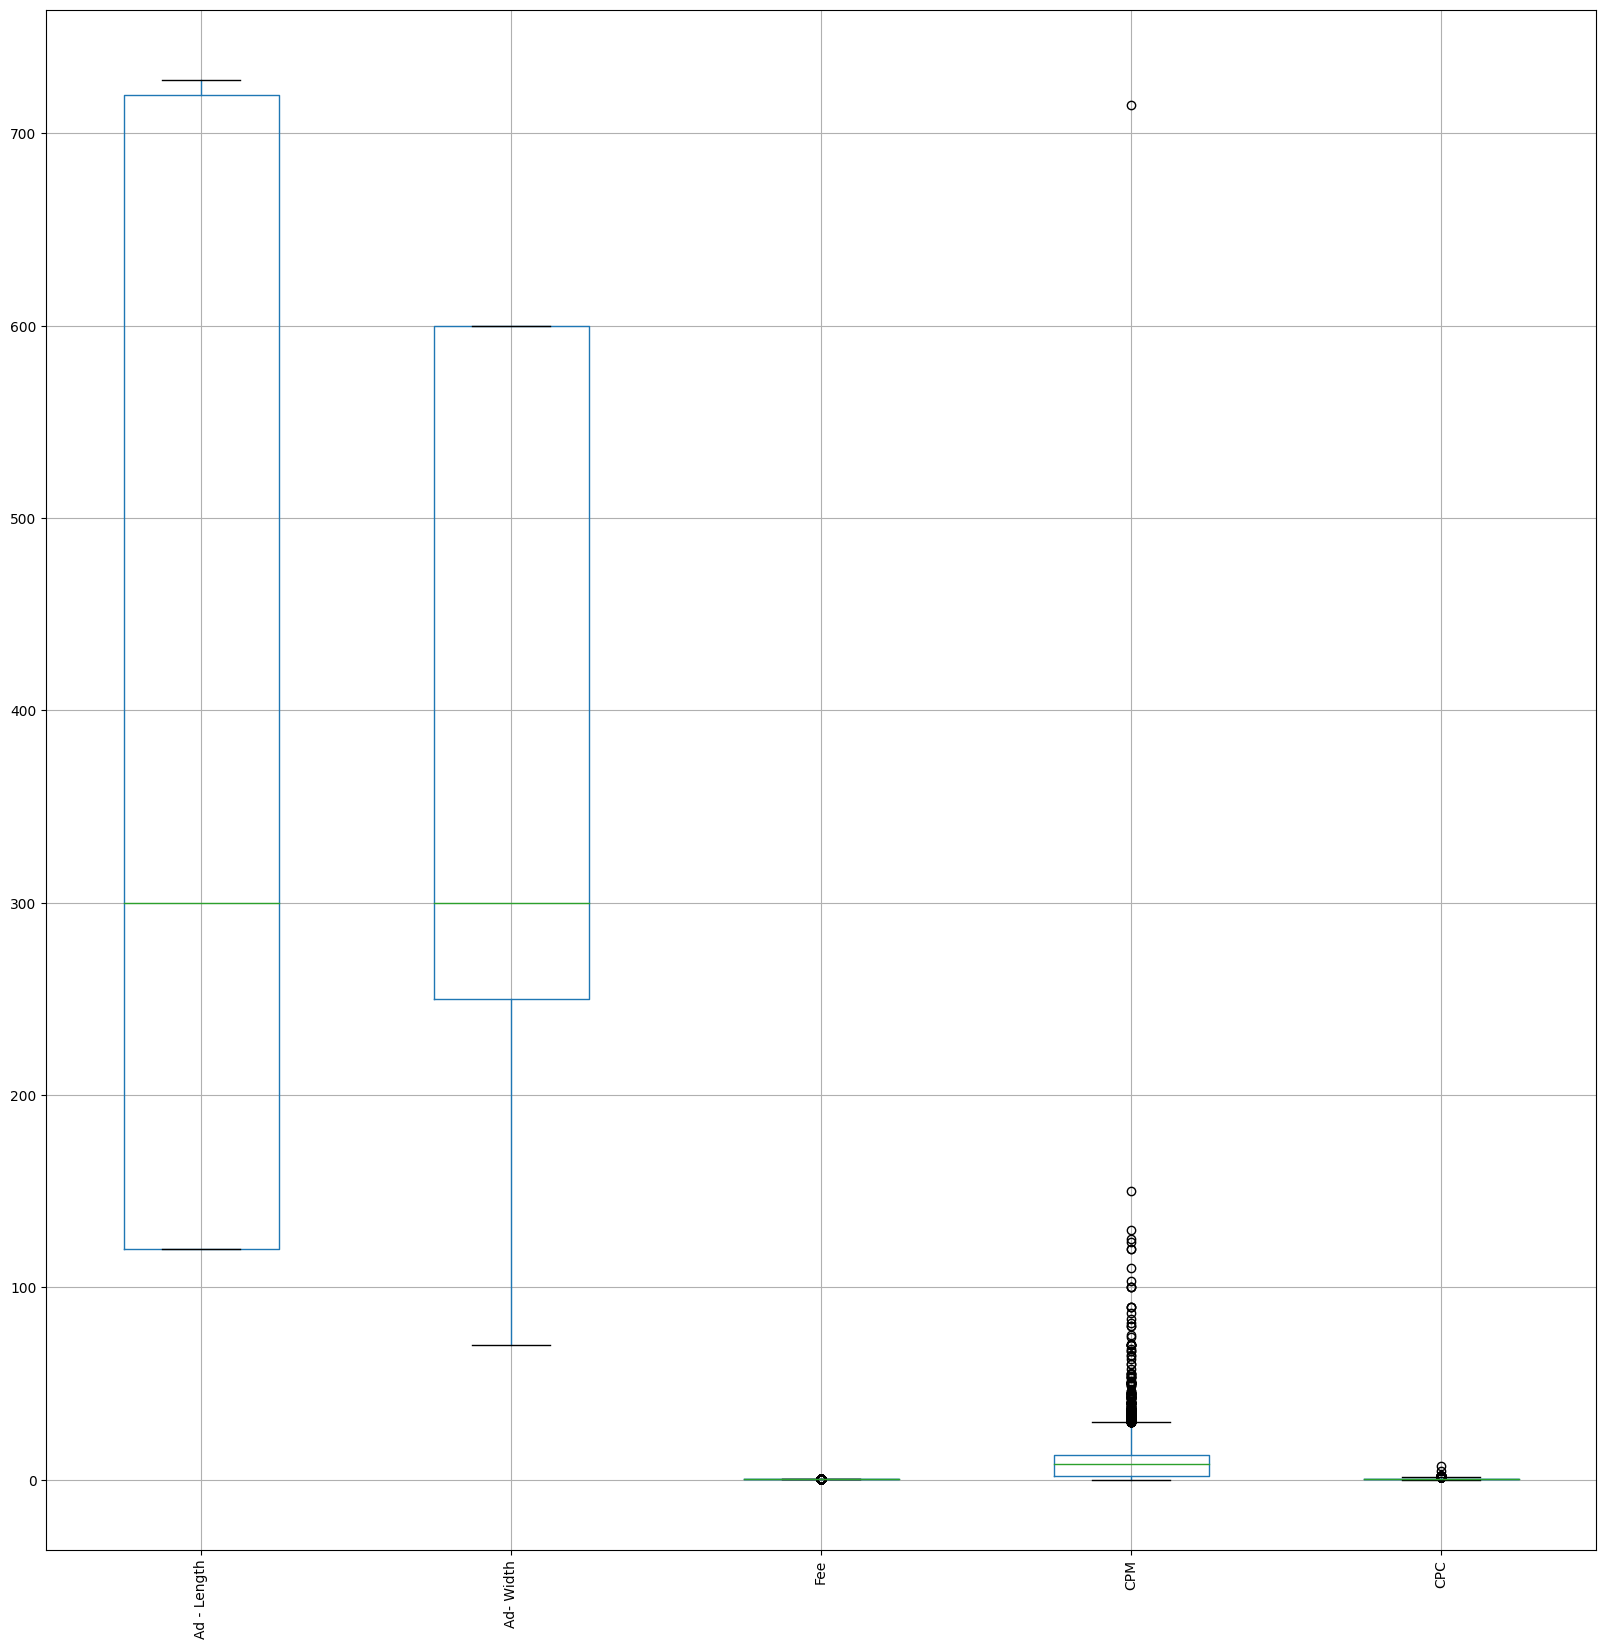

In [ ]:
df_num[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

To treat outliers lets define a function 'treat_outlier'.

For the higher outliers we will treat it to get it at 95 percentile value.

Lower level outliers will be treated to get it at 5 percentile value

In [ ]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [ ]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [ ]:
for i in df_num[outlier_list]:
    df_num[i]=treat_outlier(df_num[i])

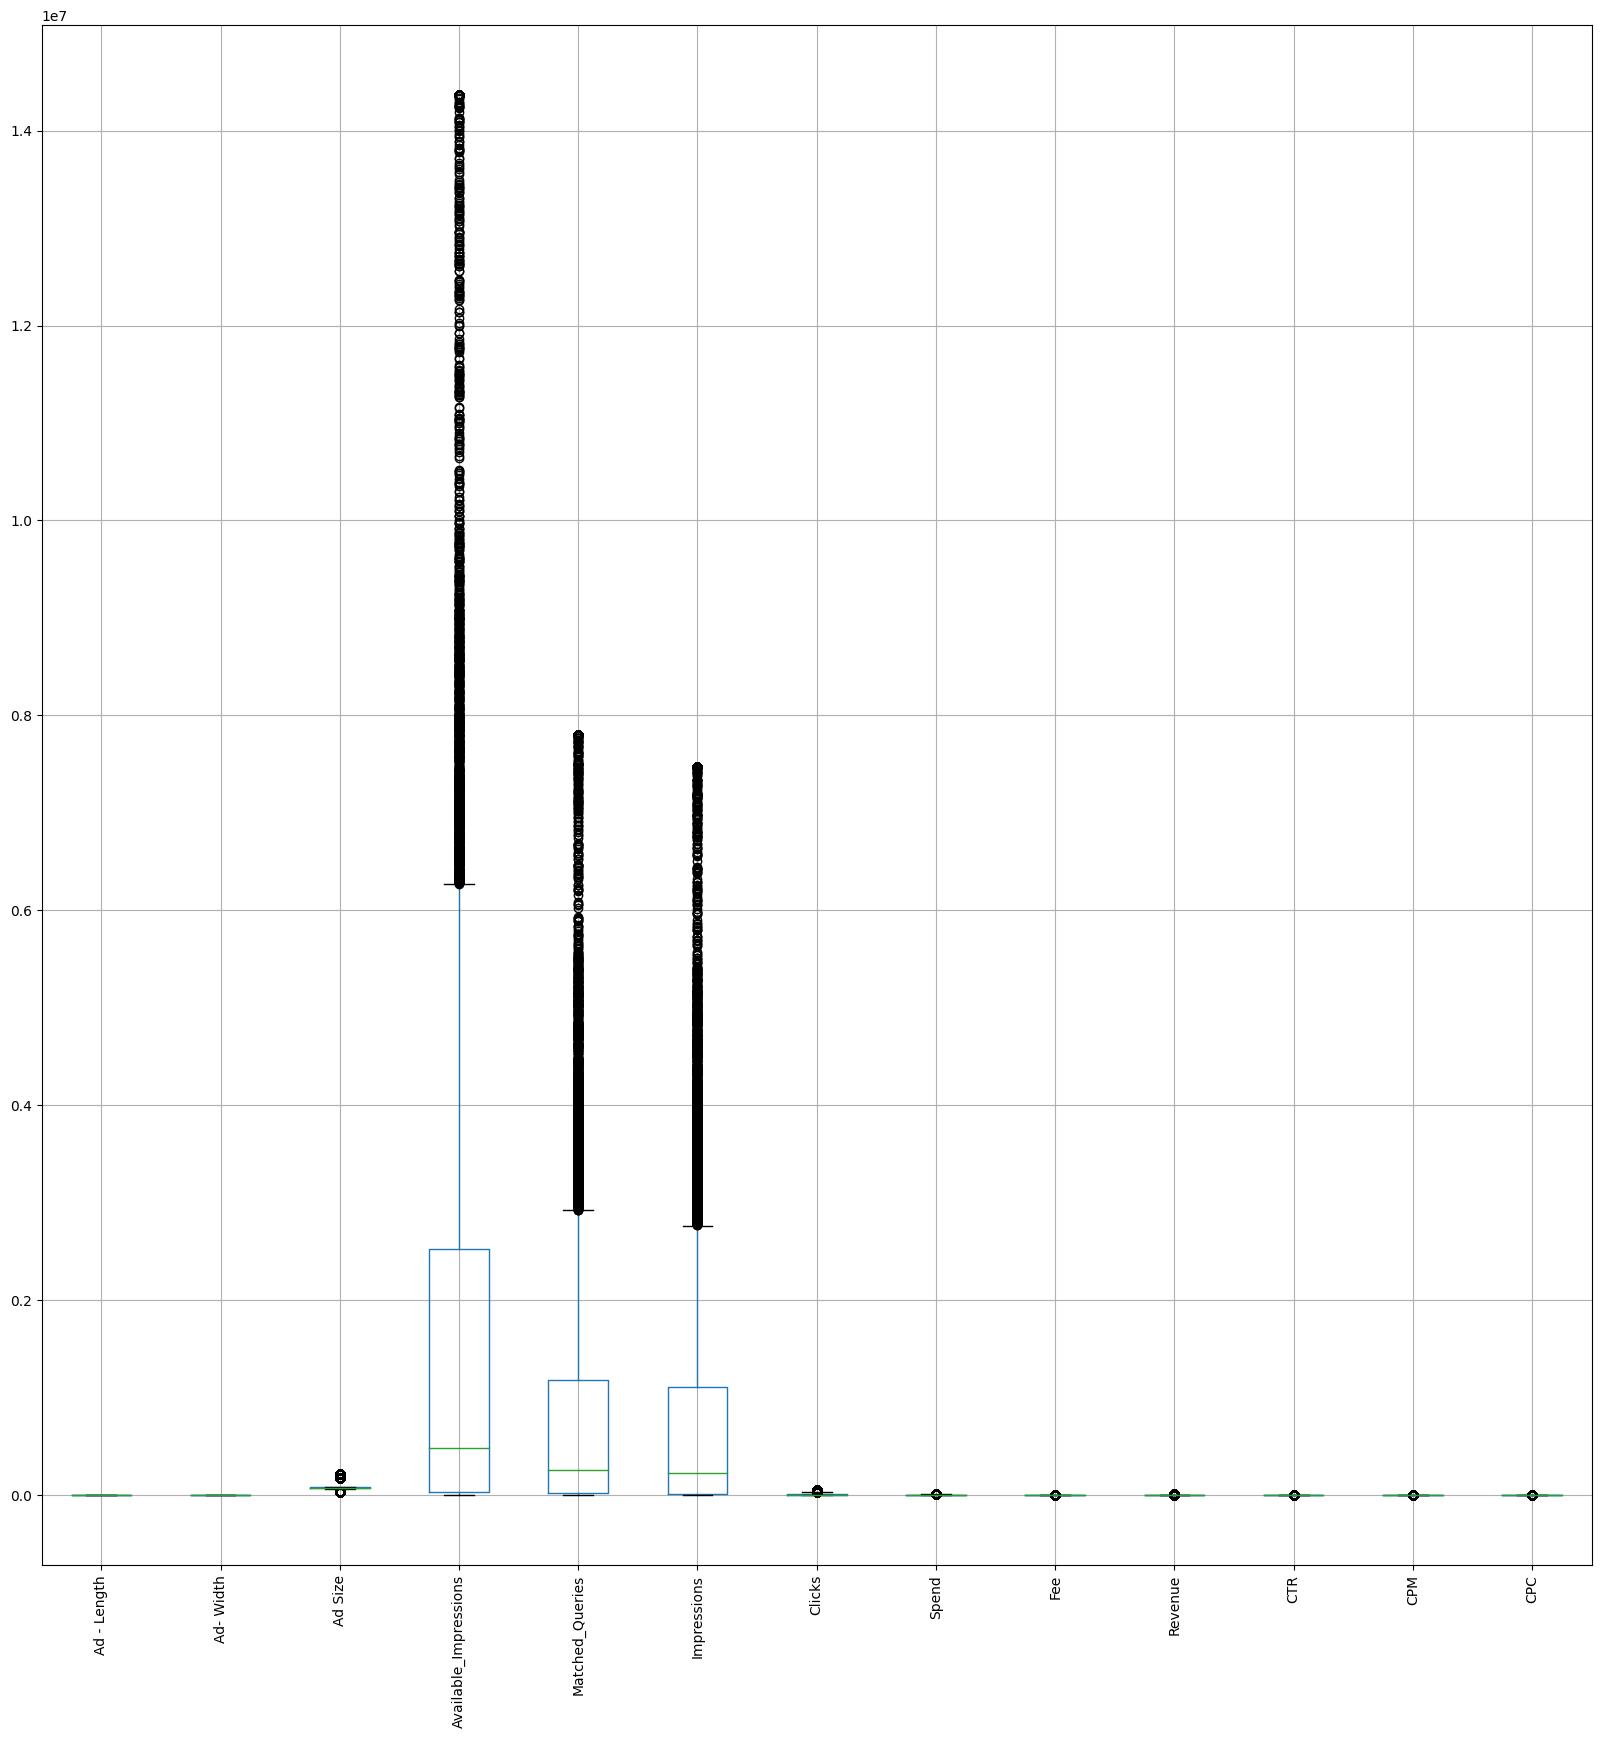

In [ ]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.352218,-0.592761,-0.586089,-0.580978,-0.737121,-0.754487,0.465447,-0.712603,-0.400200,-0.92711,-0.986603
1,-0.364496,-0.432797,-0.352218,-0.592768,-0.586109,-0.580998,-0.737121,-0.754487,0.465447,-0.712603,-0.400122,-0.92711,-0.986603
2,-0.364496,-0.432797,-0.352218,-0.592505,-0.586073,-0.580961,-0.737121,-0.754487,0.465447,-0.712603,-0.400258,-0.92711,-0.986603
3,-0.364496,-0.432797,-0.352218,-0.592587,-0.586001,-0.580887,-0.737121,-0.754487,0.465447,-0.712603,-0.400414,-0.92711,-0.986603
4,-0.364496,-0.432797,-0.352218,-0.592925,-0.586131,-0.581021,-0.737121,-0.754487,0.465447,-0.712603,-0.400005,-0.92711,-0.986603


In [ ]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


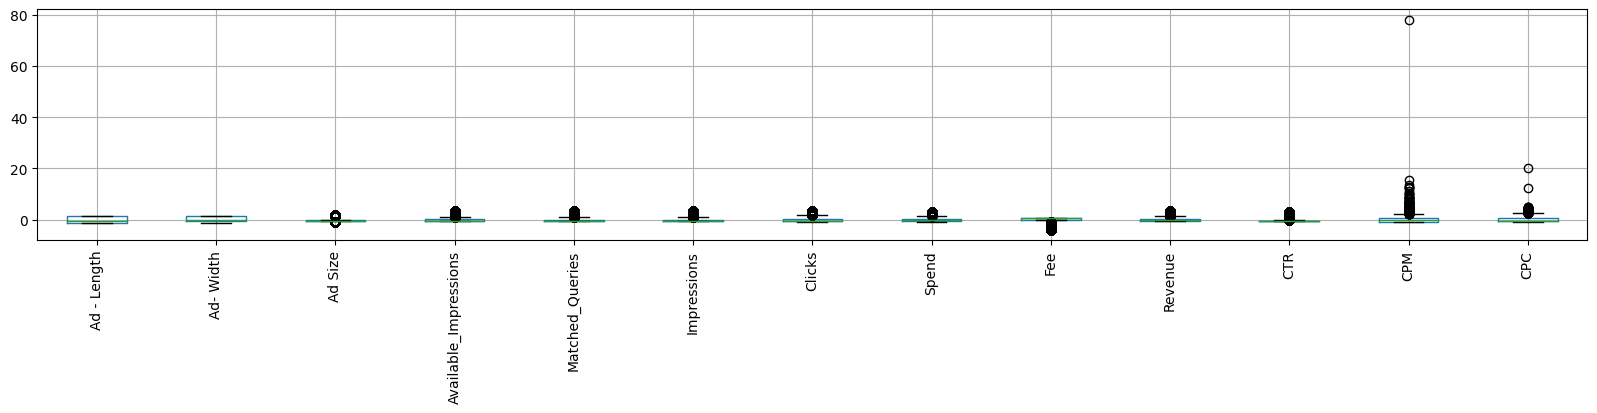

In [ ]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

##Creating the Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink = linkage(df_num_scaled, method = 'ward')


In [ ]:
linkage_matrix = linkage(df_num_scaled,method = 'ward', metric='euclidean')


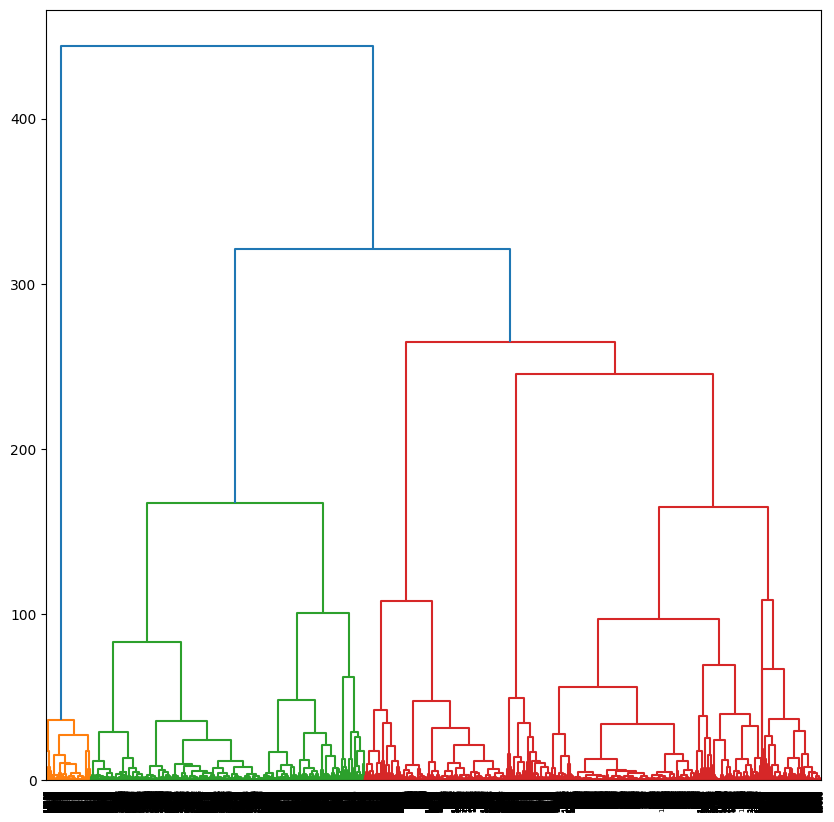

In [ ]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
dend = dendrogram(linkage_matrix)

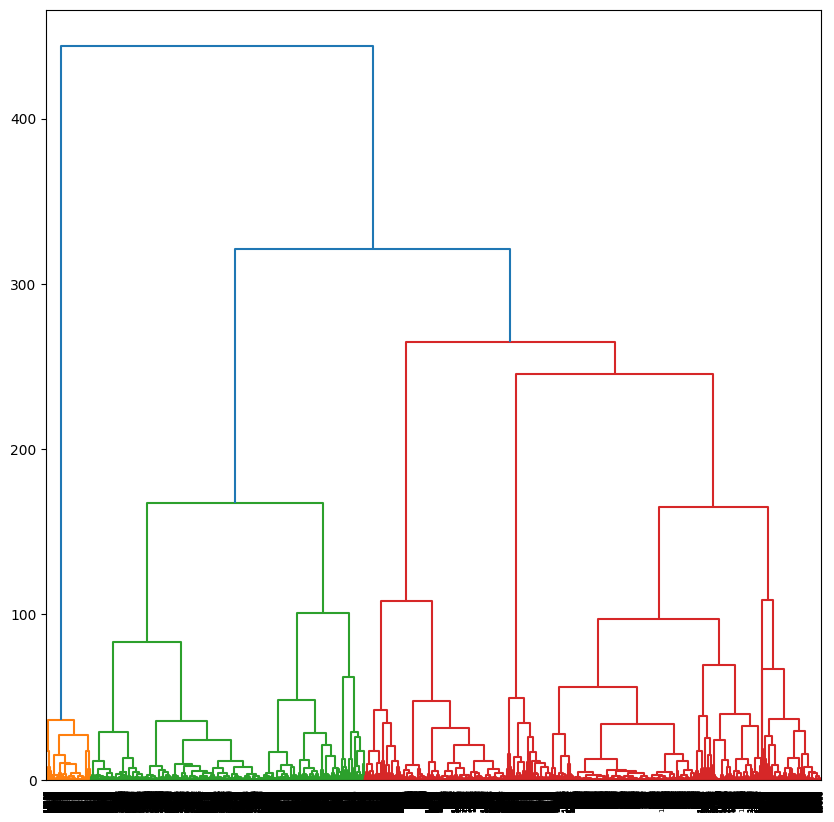

In [ ]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
dend = dendrogram(wardlink)

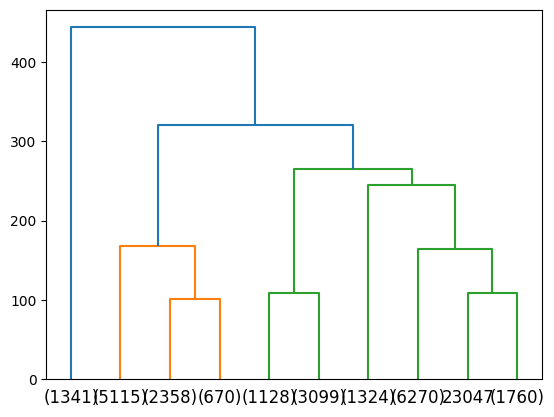

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
DF['Clusters'] = clusters

In [ ]:
DF.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,2


In [ ]:
DF.Clusters.value_counts().sort_index()

1     1341
2    21725
Name: Clusters, dtype: int64

In [ ]:
aggdata=DF.iloc[:,1:21].groupby('Clusters').mean()
aggdata['Freq']=DF.Clusters.value_counts().sort_index()
aggdata

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Clusters,,,,,,,,,,,,,,
1,682.601044,117.531693,70191.856823,1.924595e+07,1.022220e+07,9.844968e+06,18827.498881,16337.214631,0.234922,12540.624321,0.029392,1.675405,0.879615,1341
2,366.803406,351.498274,98309.136939,1.394187e+06,7.440640e+05,7.104620e+05,10175.513878,1865.262293,0.341308,1268.944858,2.774454,8.811612,0.303137,21725


##Using Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df_num_scaled)
print(Cluster_agglo)

[0 0 0 ... 0 0 0]


In [ ]:
DF["Agglo_CLusters"]=Cluster_agglo

In [ ]:
DF.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clusters', 'Agglo_CLusters'],
      dtype='object')

In [ ]:
DF.Agglo_CLusters.value_counts().sort_index()

0    21725
1     1341
Name: Agglo_CLusters, dtype: int64

In [ ]:
agglo_data=DF.drop(["Timestamp","Clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=DF.Agglo_CLusters.value_counts().sort_index()
agglo_data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Agglo_CLusters,,,,,,,,,,,,,,
0,366.803406,351.498274,98309.136939,1.394187e+06,7.440640e+05,7.104620e+05,10175.513878,1865.262293,0.341308,1268.944858,2.774454,8.811612,0.303137,21725
1,682.601044,117.531693,70191.856823,1.924595e+07,1.022220e+07,9.844968e+06,18827.498881,16337.214631,0.234922,12540.624321,0.029392,1.675405,0.879615,1341


##Creating Clusters using KMeans

Forming 2 Clusters with K=2

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [ ]:
# Fit K means on the scaled_df
k_means.fit(df_num_scaled)

KMeans(n_clusters=2, random_state=1)

In [ ]:
k_means.inertia_

196861.54754355873

In [ ]:
df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.352218,-0.592761,-0.586089,-0.580978,-0.737121,-0.754487,0.465447,-0.712603,-0.400200,-0.92711,-0.986603
1,-0.364496,-0.432797,-0.352218,-0.592768,-0.586109,-0.580998,-0.737121,-0.754487,0.465447,-0.712603,-0.400122,-0.92711,-0.986603
2,-0.364496,-0.432797,-0.352218,-0.592505,-0.586073,-0.580961,-0.737121,-0.754487,0.465447,-0.712603,-0.400258,-0.92711,-0.986603
3,-0.364496,-0.432797,-0.352218,-0.592587,-0.586001,-0.580887,-0.737121,-0.754487,0.465447,-0.712603,-0.400414,-0.92711,-0.986603
4,-0.364496,-0.432797,-0.352218,-0.592925,-0.586131,-0.581021,-0.737121,-0.754487,0.465447,-0.712603,-0.400005,-0.92711,-0.986603


##Cluster Output for all the observations

In [ ]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

##Within Cluster Sum of Squares

In [ ]:
k_means.inertia_

196861.54754355873

Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [ ]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df_num_scaled)
k_means.inertia_

299858.00000000047

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_num_scaled)
k_means.inertia_

146514.9854398781

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_num_scaled)
k_means.inertia_

110554.55510725029

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df_num_scaled)
k_means.inertia_

80016.44156075134

In [ ]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df_num_scaled)
k_means.inertia_

65768.58471487366

WSS reduces as K keeps increasing

##Calculating WSS for other values of K - Elbow Method

In [ ]:
wss =[]

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)

In [ ]:
wss

[299858.00000000047,
 196861.54754355873,
 146514.9854398781,
 110554.55510725029,
 80016.44156075134,
 65768.58471487366,
 53437.02058520891,
 47464.97993942308,
 41512.23895409236,
 36475.77094042392]

<Axes: >

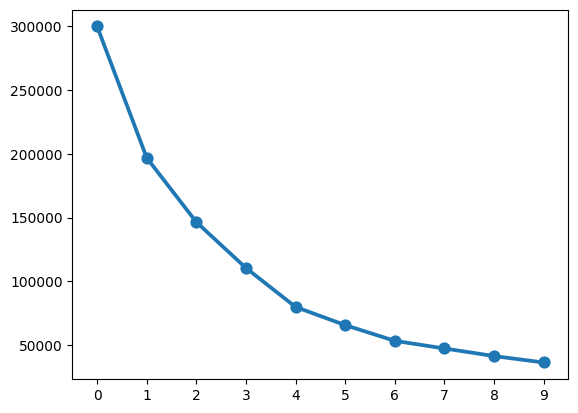

In [ ]:
sn.pointplot(wss)

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(1,10):

    # initialize K means
    kmeans=KMeans(n_clusters=i+1,random_state=1)
    kmeans.fit(df_num_scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(df_num_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i+1, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5562692971581535
For n_clusters=3, the silhouette score is 0.33516019446462325
For n_clusters=4, the silhouette score is 0.4406457912438506
For n_clusters=5, the silhouette score is 0.4937828331508482
For n_clusters=6, the silhouette score is 0.4857123627066932
For n_clusters=7, the silhouette score is 0.5194514232284791
For n_clusters=8, the silhouette score is 0.5290239340640361
For n_clusters=9, the silhouette score is 0.5291837875748412
For n_clusters=10, the silhouette score is 0.5219900671829257


In [ ]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_num_scaled)
labels = k_means.labels_

In [ ]:
k_means.inertia_

196861.54754355873

In [ ]:
# Calculating silhouette_score
silhouette_score(df_num_scaled,labels,random_state=1)

0.5562692971581535

silhouette score is better for 2 clusters than for 3 and 4 clusters. So, final clusters will be 2

Appending Clusters to the original dataset

In [ ]:
DF["Cluster"] = labels
DF.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters,Agglo_CLusters,Clus_kmeans,Cluster
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,0.0,0.35,0.0,0.0031,0.0,0.0,2,0,0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,0.0,0.35,0.0,0.0035,0.0,0.0,2,0,0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,0.0,0.35,0.0,0.0028,0.0,0.0,2,0,0,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,0.0,0.35,0.0,0.0020,0.0,0.0,2,0,0,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,0.0,0.35,0.0,0.0041,0.0,0.0,2,0,0,0


##Cluster Profiling

In [ ]:
DF.Clus_kmeans.value_counts().sort_index()

0    21371
1     1695
Name: Clus_kmeans, dtype: int64

In [ ]:
DF.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clusters,Agglo_CLusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,1,0.0,0.35,0.0,0.0031,0.0,0.0,2,0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,1,0.0,0.35,0.0,0.0035,0.0,0.0,2,0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,1,0.0,0.35,0.0,0.0028,0.0,0.0,2,0,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,1,0.0,0.35,0.0,0.0020,0.0,0.0,2,0,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,1,0.0,0.35,0.0,0.0041,0.0,0.0,2,0,0


In [ ]:
clust_profile=DF.drop(['Clusters', 'Agglo_CLusters','Clus_kmeans'],axis=1)
clust_profile1=clust_profile.groupby('Cluster').mean()
clust_profile1['freq']=DF.Clus_kmeans.value_counts().sort_index()
clust_profile1

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Cluster,,,,,,,,,,,,,,
0,364.287867,354.430303,98735.316083,1.277661e+06,6.783578e+05,6.466786e+05,10197.351785,1778.509725,0.342239,1205.457931,2.819732,8.931070,0.292862,21371
1,648.363422,129.427729,70690.761062,1.698680e+07,9.071134e+06,8.741428e+06,16745.197640,14408.552684,0.245404,10986.998714,0.031815,1.659643,0.888768,1695


In [ ]:
clust_profile.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,0


In [ ]:
clust_profile

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.00,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.00,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.00,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.00,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07,0
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0000,20.0,0.04,0
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0000,50.0,0.05,0
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07,0


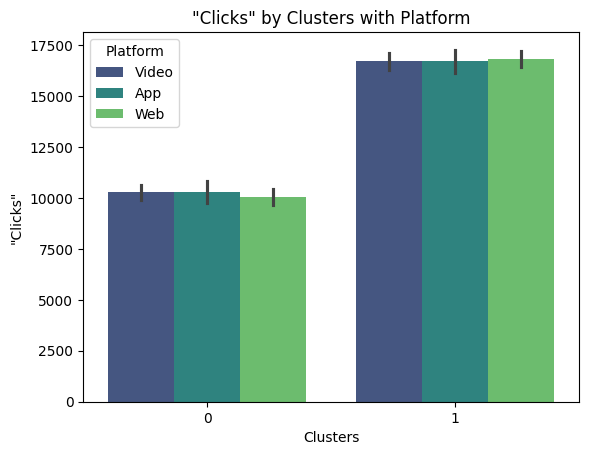

In [ ]:
sn.barplot(x='Cluster', y='Clicks', hue='Platform', data=clust_profile, palette='viridis')
plt.title('"Clicks" by Clusters with Platform')
plt.xlabel('Clusters')
plt.ylabel('"Clicks"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Platform'])['Clicks'].mean()

Cluster  Platform
0        App         10285.687159
         Video       10280.068766
         Web         10045.223124
1        App         16703.340845
         Video       16708.830579
         Web         16812.399023
Name: Clicks, dtype: float64

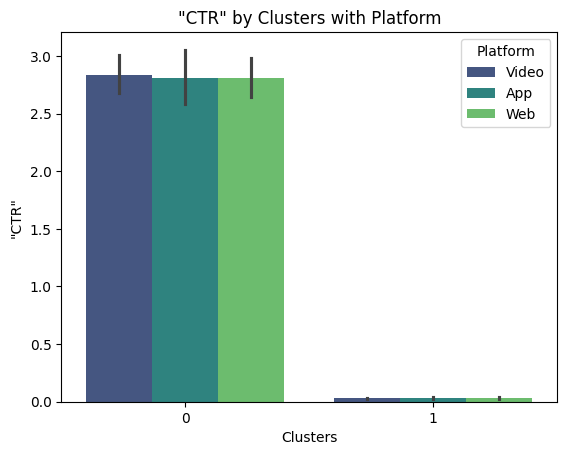

In [ ]:
sn.barplot(x='Cluster', y='CTR', hue='Platform', data=clust_profile, palette='viridis')
plt.title('"CTR" by Clusters with Platform')
plt.xlabel('Clusters')
plt.ylabel('"CTR"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Platform'])['CTR'].mean()

Cluster  Platform
0        App         2.810596
         Video       2.833511
         Web         2.808718
1        App         0.031827
         Video       0.031093
         Web         0.032663
Name: CTR, dtype: float64

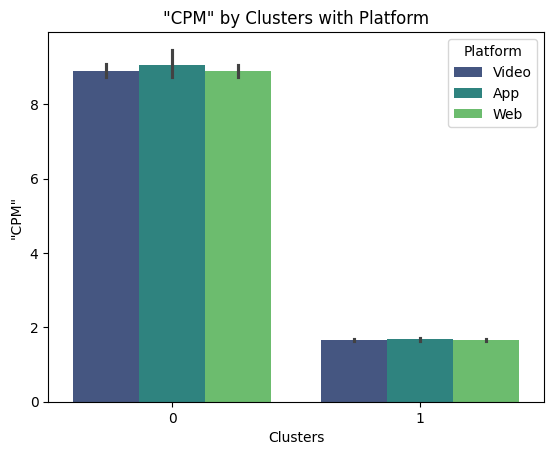

In [ ]:
sn.barplot(x='Cluster', y='CPM', hue='Platform', data=clust_profile, palette='viridis')
plt.title('"CPM" by Clusters with Platform')
plt.xlabel('Clusters')
plt.ylabel('"CPM"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Platform'])['CPM'].mean()

Cluster  Platform
0        App         9.058879
         Video       8.900062
         Web         8.891442
1        App         1.677684
         Video       1.657320
         Web         1.651958
Name: CPM, dtype: float64

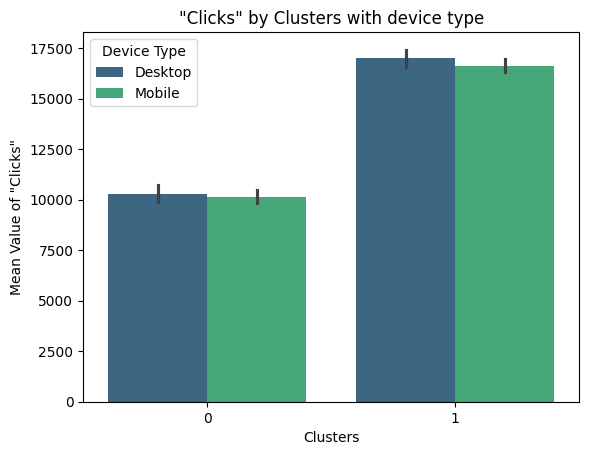

In [ ]:
sn.barplot(x='Cluster', y='Clicks', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('"Clicks" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "Clicks"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['Clicks'].mean().reset_index()

,Cluster,Device Type,Clicks
0,0,Desktop,10291.185785
1,0,Mobile,10144.993001
2,1,Desktop,16991.643564
3,1,Mobile,16608.056933


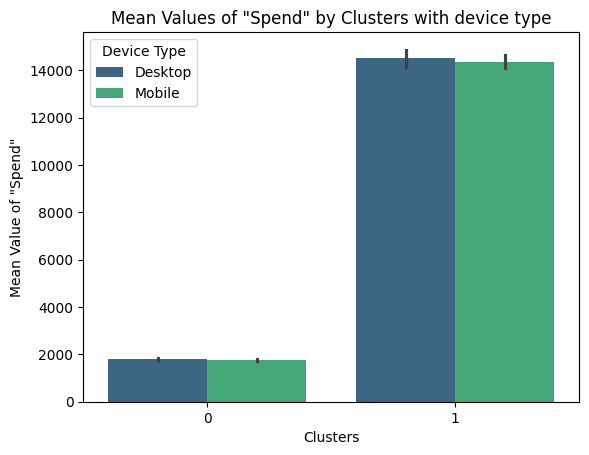

In [ ]:
sn.barplot(x='Clus_kmeans', y='Spend', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('Mean Values of "Spend" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "Spend"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['Spend'].mean().reset_index()

,Cluster,Device Type,Spend
0,0,Desktop,1784.449522
1,0,Mobile,1775.195356
2,1,Desktop,14504.890066
3,1,Mobile,14354.943453


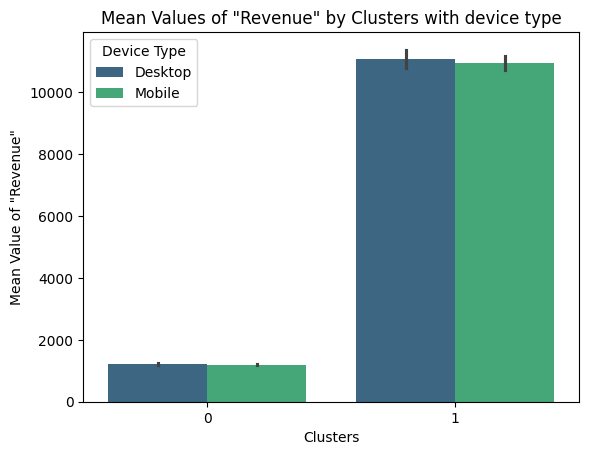

In [ ]:
sn.barplot(x='Clus_kmeans', y='Revenue', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('Mean Values of "Revenue" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "Revenue"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['Revenue'].mean().reset_index()

,Cluster,Device Type,Revenue
0,0,Desktop,1209.591578
1,0,Mobile,1203.151382
2,1,Desktop,11065.013966
3,1,Mobile,10943.585268


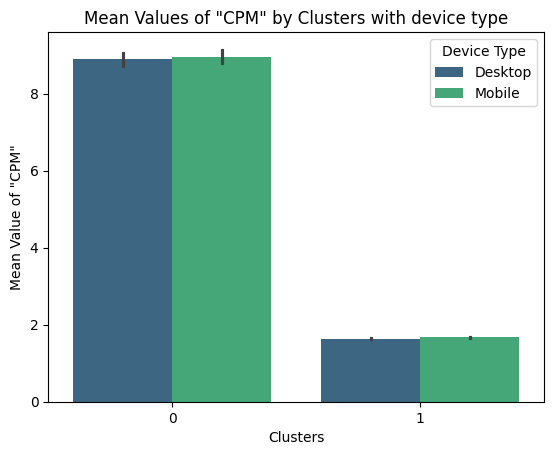

In [ ]:
sn.barplot(x='Clus_kmeans', y='CPM', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('Mean Values of "CPM" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "CPM"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['CPM'].mean().reset_index()

,Cluster,Device Type,CPM
0,0,Desktop,8.883758
1,0,Mobile,8.957469
2,1,Desktop,1.640411
3,1,Mobile,1.670345


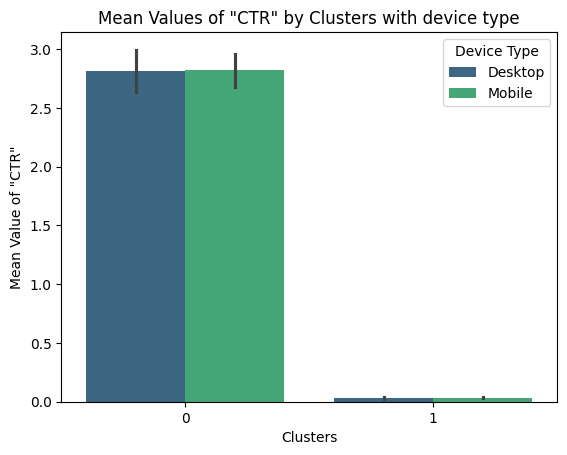

In [ ]:
sn.barplot(x='Clus_kmeans', y='CTR', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('Mean Values of "CTR" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "CTR"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['CTR'].mean().reset_index()

,Cluster,Device Type,CTR
0,0,Desktop,2.816359
1,0,Mobile,2.821615
2,1,Desktop,0.031133
3,1,Mobile,0.032195


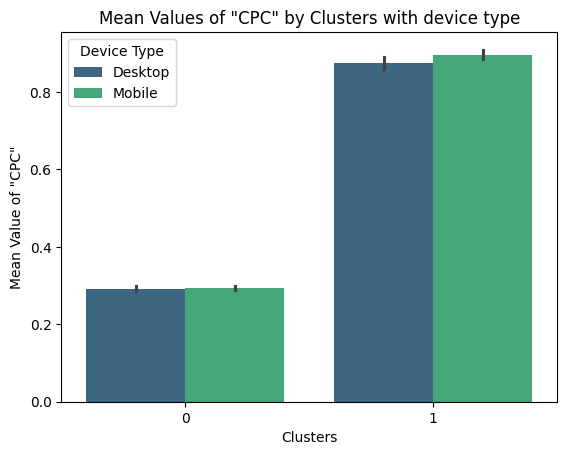

In [ ]:
sn.barplot(x='Clus_kmeans', y='CPC', hue='Device Type', data=clust_profile, palette='viridis')
plt.title('Mean Values of "CPC" by Clusters with device type')
plt.xlabel('Clusters')
plt.ylabel('Mean Value of "CPC"')
plt.show()

In [ ]:
clust_profile.groupby(['Cluster','Device Type'])['CPC'].mean().reset_index()

,Cluster,Device Type,CPC
0,0,Desktop,0.291670
1,0,Mobile,0.293528
2,1,Desktop,0.874832
3,1,Mobile,0.896523
